In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

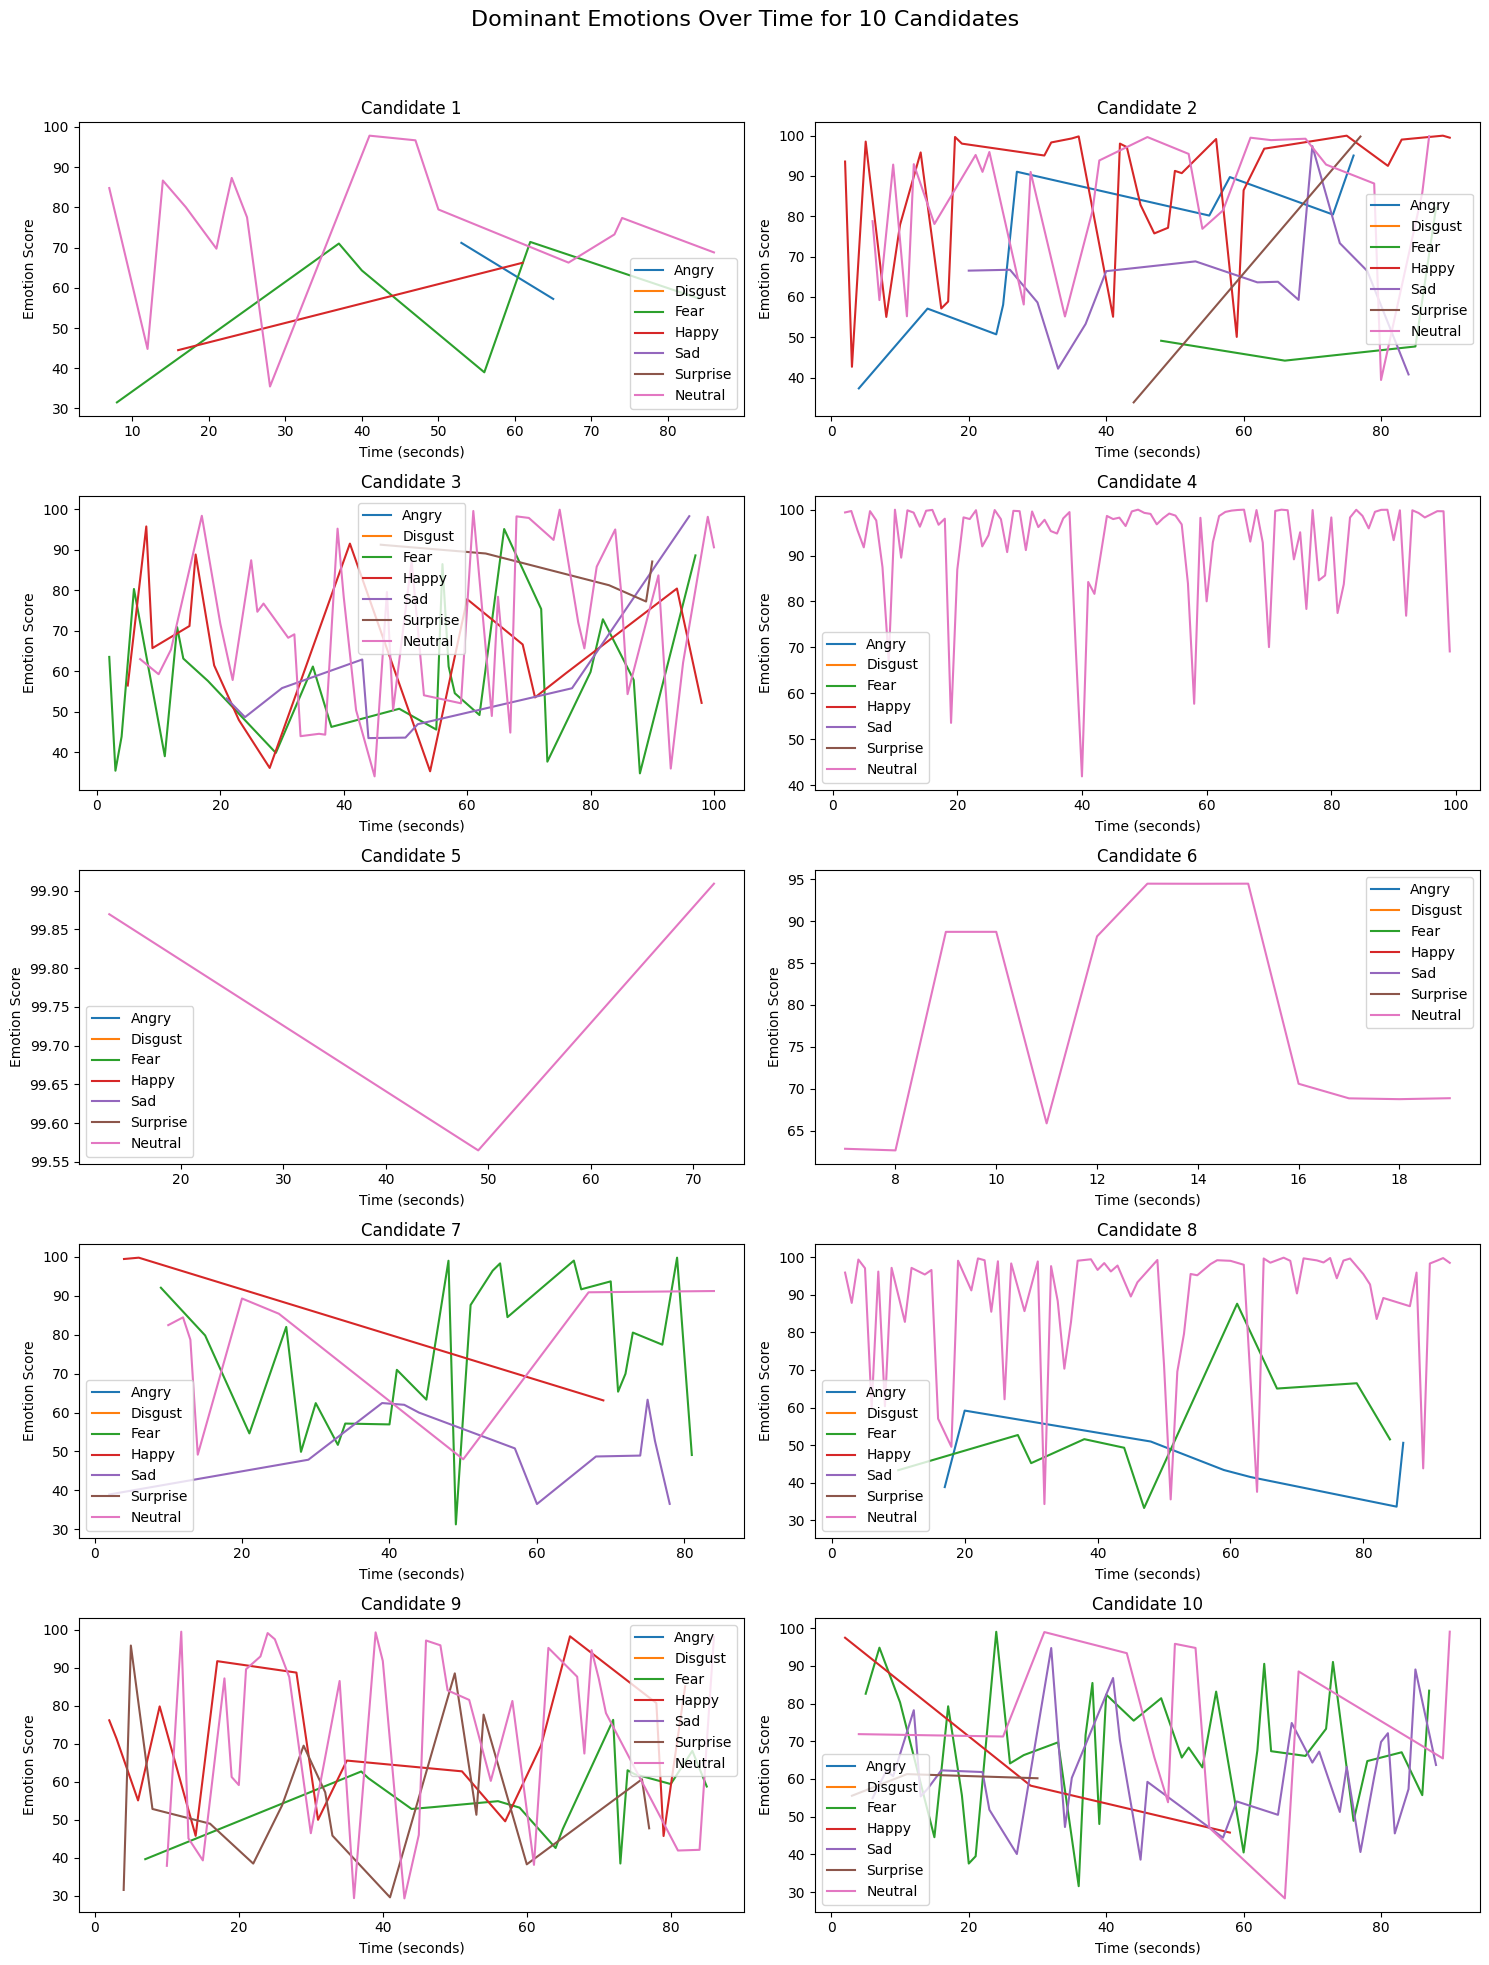

In [11]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a dictionary to map emotion codes to their full names
emotion_mapping = {
    'angry': 'Angry',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happy',
    'sad': 'Sad',
    'surprise': 'Surprise',
    'neutral': 'Neutral'
}

# Create subplots for each candidate
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Dominant Emotions Over Time for 10 Candidates', fontsize=16)

for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    for emotion_code, emotion_name in emotion_mapping.items():
        candidate_emotion_data = df[df['dominant_emotion'] == emotion_code]
        ax.plot(candidate_emotion_data['elapsed_time'], candidate_emotion_data[emotion_code], label=emotion_name)

    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Emotion Score')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


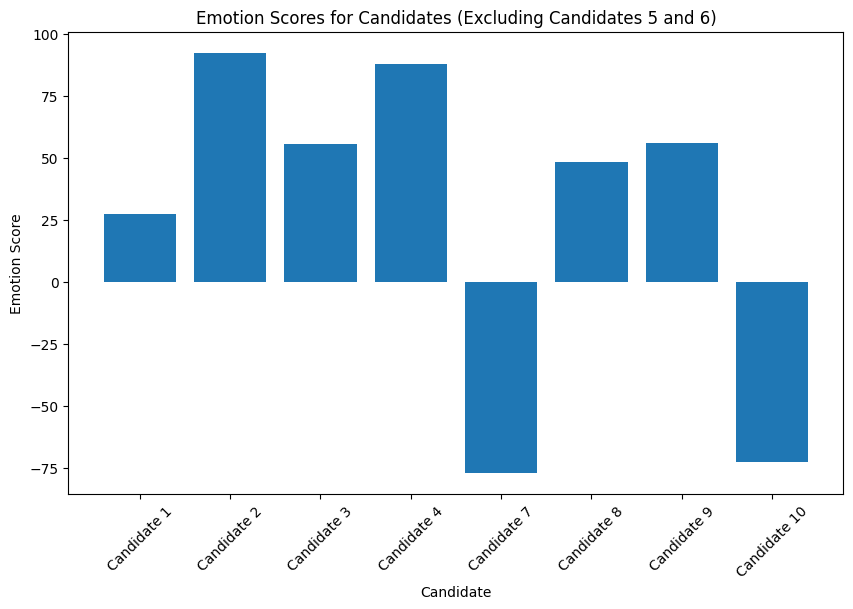

In [58]:
# Define the emotion scores
emotion_scores = {
    'angry': -1,
    'disgust': -1,
    'fear': -2,
    'happy': 3,
    'sad': -1,
    'surprise': 1,
    'neutral': 2
}

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a dictionary to store the average percentage of emotions multiplied by scores for each candidate
candidate_scores = {}

# Calculate the average percentage of emotions for each candidate
for i, df in enumerate(dfs):
    if i + 1 not in [5, 6]:  # Exclude candidates 5 and 6
        emotion_percentages = df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
        average_percentages = emotion_percentages.mean()
        candidate_score = (average_percentages * pd.Series(emotion_scores)).sum()
        candidate_scores[f'Candidate {i + 1}'] = candidate_score

# Create a bar chart to compare the scores of candidates (excluding candidates 5 and 6)
plt.figure(figsize=(10, 6))
plt.bar(candidate_scores.keys(), candidate_scores.values())
plt.title('Emotion Scores for Candidates (Excluding Candidates 5 and 6)')
plt.xlabel('Candidate')
plt.ylabel('Emotion Score')
plt.xticks(rotation=45)
plt.show()


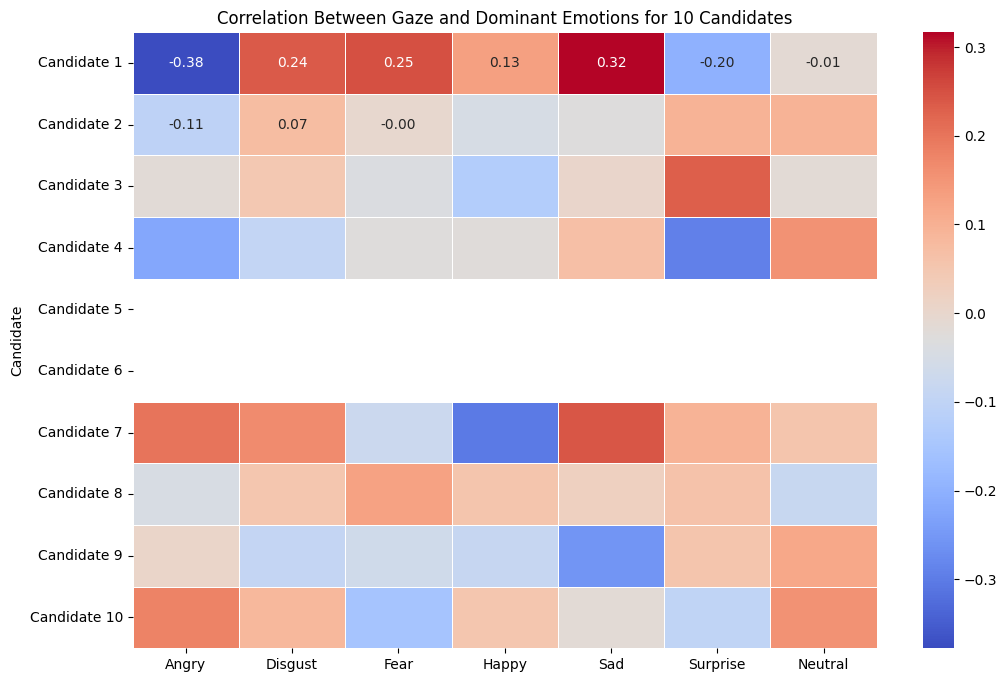

In [12]:
# Create a list to store the correlation coefficients for each candidate
correlation_coefficients = []

# Read and calculate correlation for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    
    # Calculate the correlation between 'gaze' and each dominant emotion column
    correlation_data = df[['gaze', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].corr()
    
    # Store the correlation coefficient between 'gaze' and each emotion in a dictionary
    correlation_dict = {
        'Candidate': f'Candidate {i}',
        'Angry': correlation_data.loc['gaze', 'angry'],
        'Disgust': correlation_data.loc['gaze', 'disgust'],
        'Fear': correlation_data.loc['gaze', 'fear'],
        'Happy': correlation_data.loc['gaze', 'happy'],
        'Sad': correlation_data.loc['gaze', 'sad'],
        'Surprise': correlation_data.loc['gaze', 'surprise'],
        'Neutral': correlation_data.loc['gaze', 'neutral']
    }
    
    # Append the correlation data to the list
    correlation_coefficients.append(correlation_dict)

# Create a DataFrame from the correlation data
correlation_df = pd.DataFrame(correlation_coefficients)

# Set the 'Candidate' column as the index
correlation_df.set_index('Candidate', inplace=True)

# Plot a heatmap of correlation coefficients
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Gaze and Dominant Emotions for 10 Candidates')
plt.show()


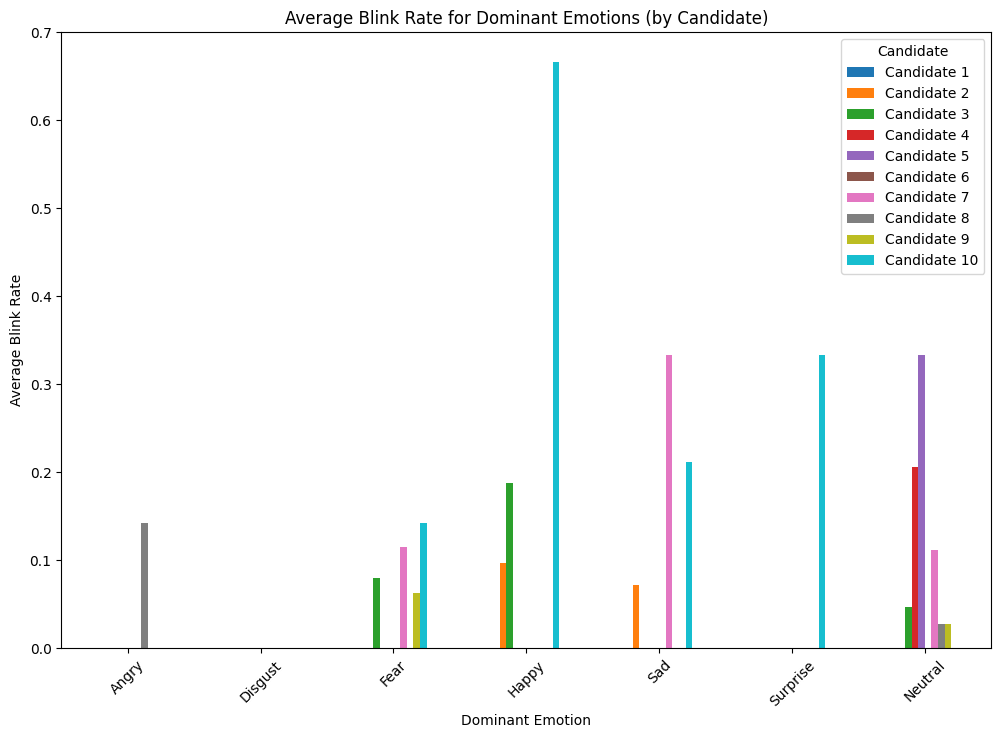

In [23]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a dictionary to map emotion codes to their full names
emotion_mapping = {
    'angry': 'Angry',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happy',
    'sad': 'Sad',
    'surprise': 'Surprise',
    'neutral': 'Neutral'
}

# Calculate the average blink rate for each dominant emotion for each candidate
avg_blink_rates = []

for i, df in enumerate(dfs):
    candidate_avg_blink_rate = {}
    for emotion_code, emotion_name in emotion_mapping.items():
        avg_blink_rate = df[df['dominant_emotion'] == emotion_code]['blink'].mean()
        candidate_avg_blink_rate[emotion_name] = avg_blink_rate
    avg_blink_rates.append(candidate_avg_blink_rate)

# Create a DataFrame from the average blink rate data
avg_blink_rates_df = pd.DataFrame(avg_blink_rates)
avg_blink_rates_df.index = [f'Candidate {i + 1}' for i in range(10)]

# Transpose the DataFrame for plotting
avg_blink_rates_df = avg_blink_rates_df.transpose()

# Create a bar chart to compare blink rate and dominant emotion for each candidate
plt.figure(figsize=(12, 8))
sns.set_palette("tab10")
avg_blink_rates_df.plot(kind='bar', ax=plt.gca())
plt.title('Average Blink Rate for Dominant Emotions (by Candidate)')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Blink Rate')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.show()


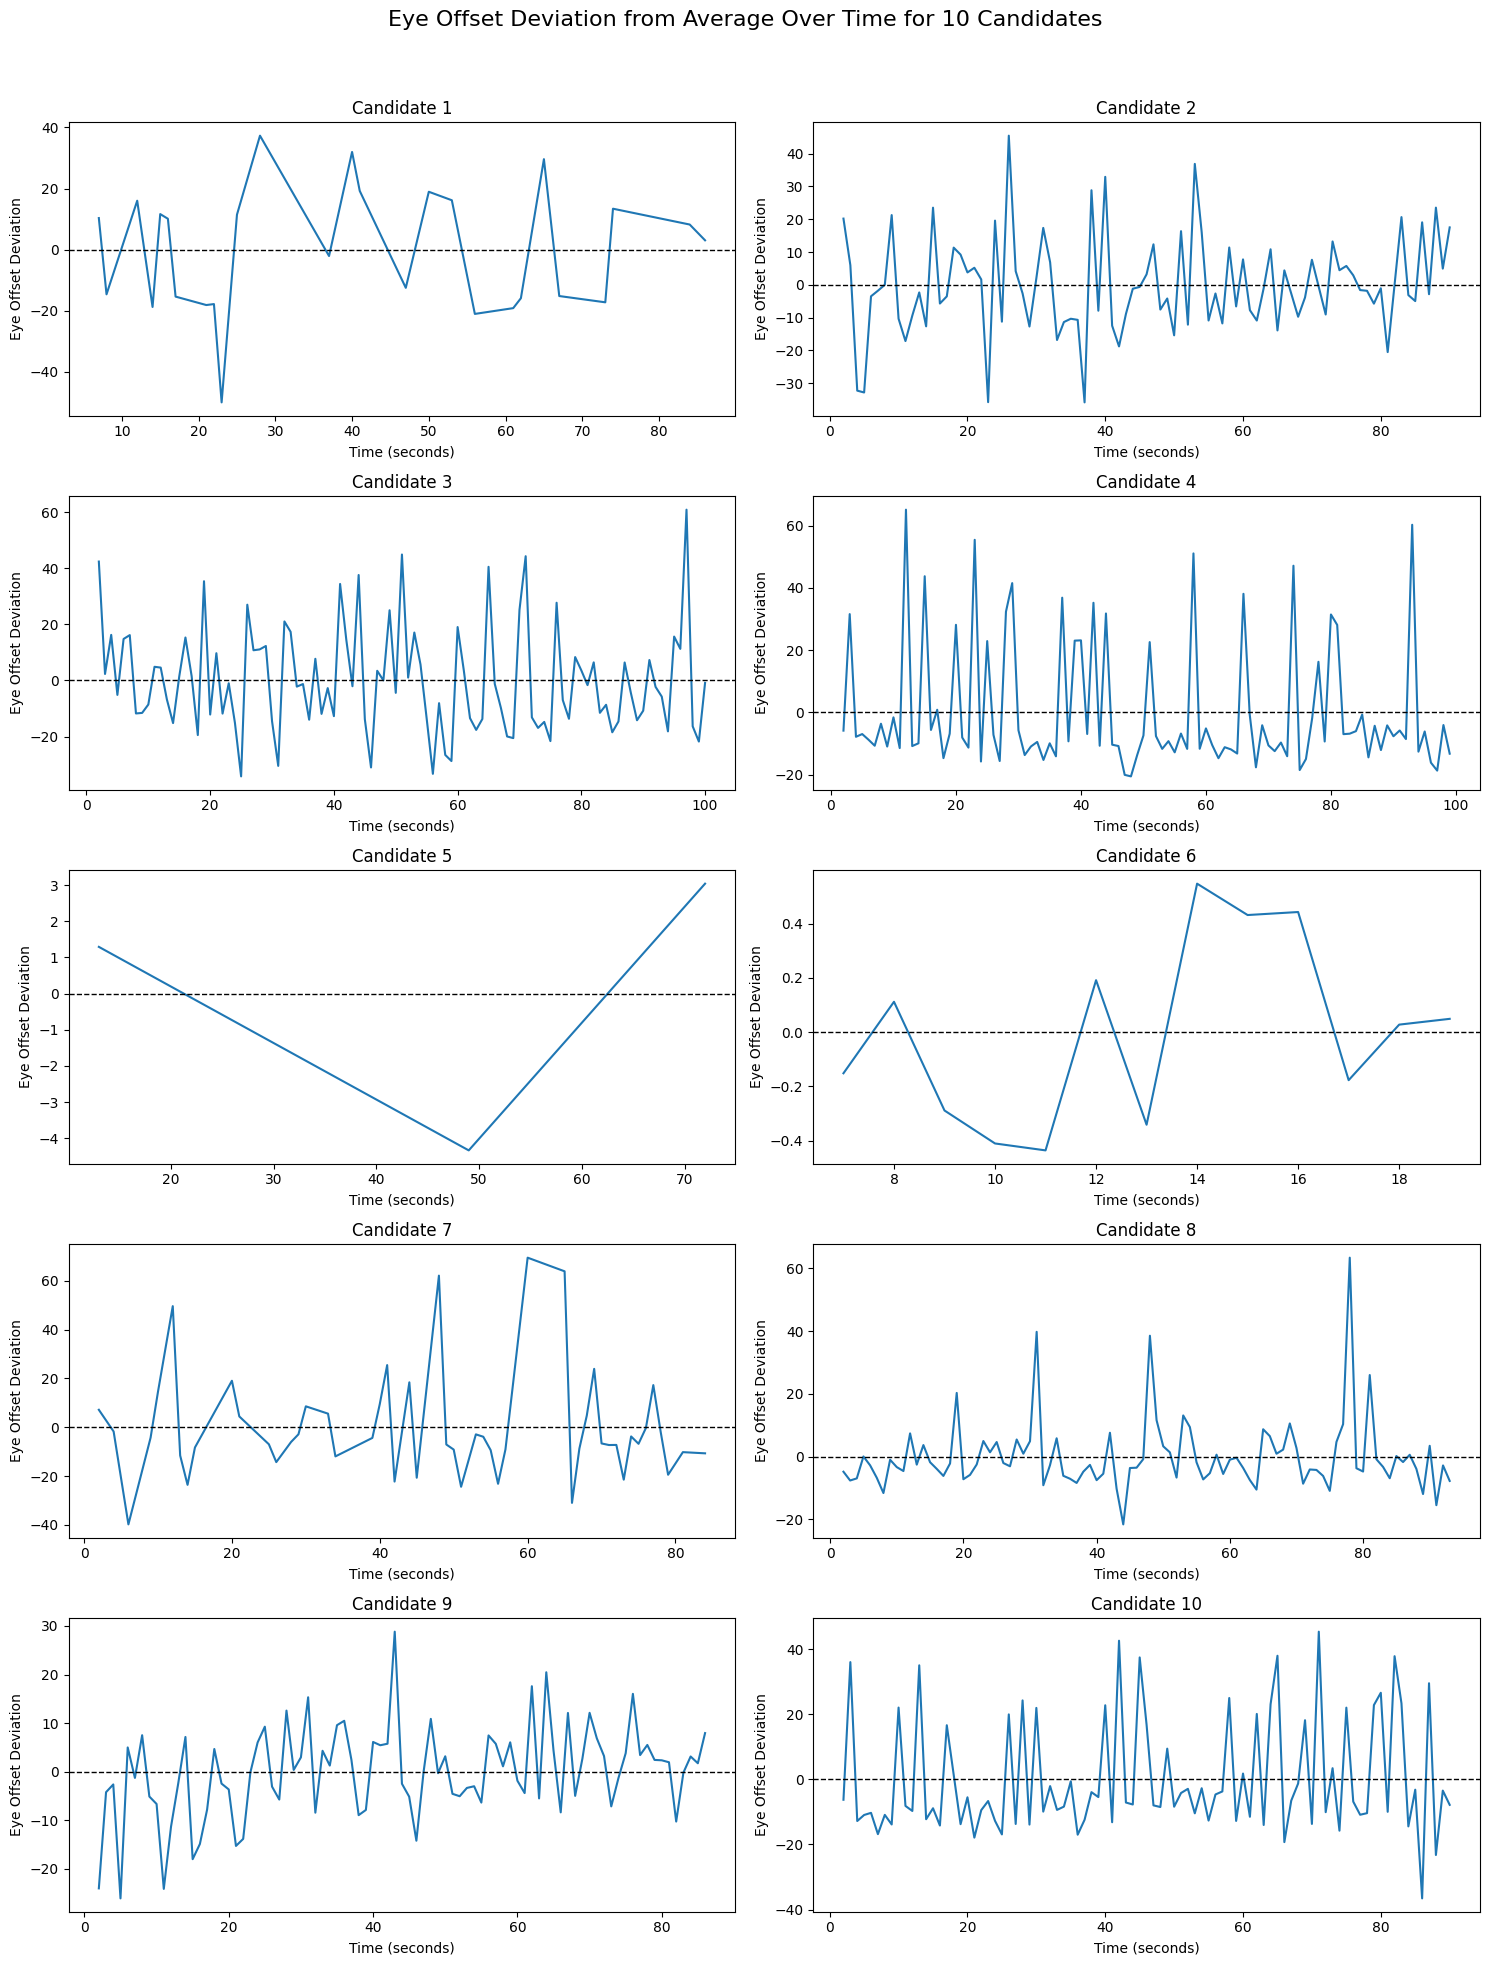

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a figure and axes for subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Eye Offset Deviation from Average Over Time for 10 Candidates', fontsize=16)

# Calculate and plot eye offset deviation for each candidate
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Calculate average eye offset for the candidate
    avg_eye_offset = df['eye_offset'].mean()

    # Calculate eye offset deviation from the average over time
    eye_offset_deviation = df['eye_offset'] - avg_eye_offset

    # Plot eye offset deviation over time
    ax.plot(df['elapsed_time'], eye_offset_deviation)
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Eye Offset Deviation')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [26]:
import pandas as pd

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Initialize variables to store candidate with highest deviation and the maximum deviation
candidate_with_highest_deviation = None
highest_deviation = 0.0  # Initialize with a low value

# Iterate through candidates and calculate maximum deviation
for i, df in enumerate(dfs):
    # Calculate average eye offset for the candidate
    avg_eye_offset = df['eye_offset'].mean()

    # Calculate eye offset deviation from the average over time
    eye_offset_deviation = df['eye_offset'] - avg_eye_offset

    # Calculate the maximum absolute deviation
    max_deviation = eye_offset_deviation.abs().max()

    # Check if this candidate has the highest deviation so far
    if max_deviation > highest_deviation:
        highest_deviation = max_deviation
        candidate_with_highest_deviation = f'Candidate {i + 1}'

# Print the candidate with the highest deviation
print(f'The candidate with the highest eye offset deviation is: {candidate_with_highest_deviation}')
print(f'Highest eye offset deviation value: {highest_deviation}')


The candidate with the highest eye offset deviation is: Candidate 7
Highest eye offset deviation value: 69.43804313725491


Candidate comparison of deviatio of eye offset from the average eye offset over time

In [27]:
import pandas as pd

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a dictionary to store the average eye offset deviation for each candidate
average_deviations = {}

# Calculate and store the average eye offset deviation for each candidate
for i, df in enumerate(dfs):
    # Calculate average eye offset for the candidate
    avg_eye_offset = df['eye_offset'].mean()

    # Calculate eye offset deviation from the average over time
    eye_offset_deviation = df['eye_offset'] - avg_eye_offset

    # Calculate the average deviation for the candidate
    average_deviation = abs(eye_offset_deviation).mean()

    # Store the average deviation in the dictionary
    average_deviations[f'Candidate {i + 1}'] = average_deviation

# Sort the candidates by average deviation in descending order
sorted_candidates = sorted(average_deviations.items(), key=lambda x: x[1], reverse=True)

# Print the candidates from highest to lowest average deviation
print("Candidates with Highest to Lowest Eye Offset Deviation:")
for candidate, deviation in sorted_candidates:
    print(f"{candidate}: {deviation:.2f}")


Candidates with Highest to Lowest Eye Offset Deviation:
Candidate 1: 17.60
Candidate 7: 15.82
Candidate 4: 15.64
Candidate 3: 14.90
Candidate 10: 14.57
Candidate 2: 11.58
Candidate 9: 7.22
Candidate 8: 7.09
Candidate 5: 2.89
Candidate 6: 0.28


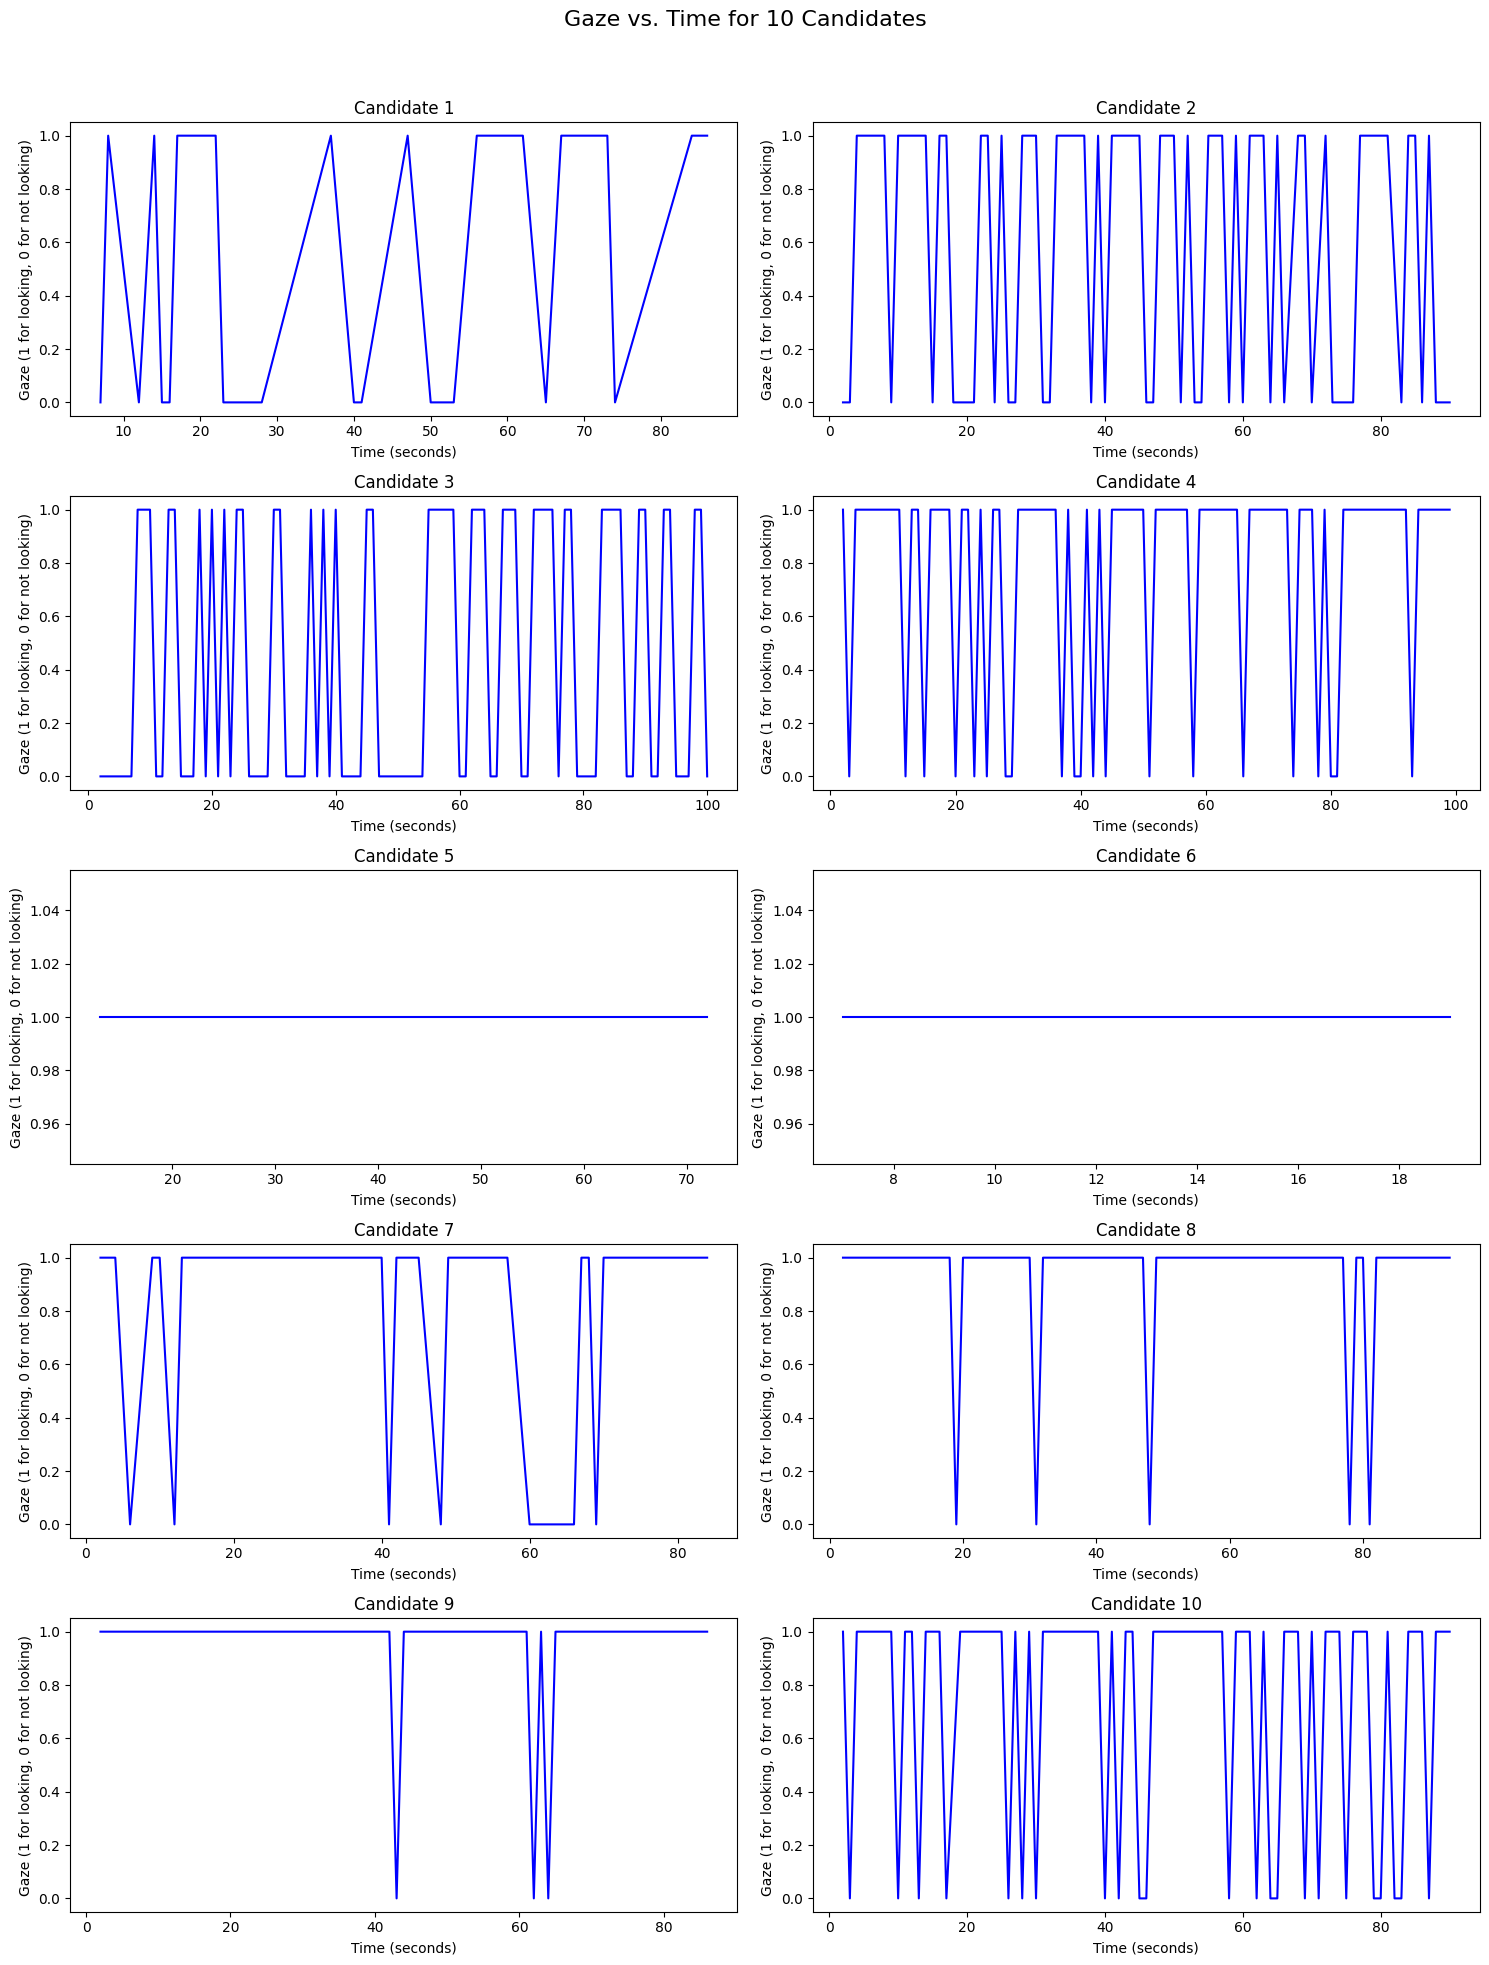

Candidates ranked by the percentage of time looking at the camera (High to Low):
Candidate 9: 95.35%
Candidate 8: 93.55%
Candidate 4: 77.78%
Candidate 10: 72.22%
Candidate 2: 57.78%
Candidate 3: 44.00%


In [39]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\merged_emotion\\merged_emotion_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Calculate the median number of rows across all candidates
median_row_count = int(pd.concat(dfs)['elapsed_time'].count() / len(dfs))

# Create a figure and axes for subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Gaze vs. Time for 10 Candidates', fontsize=16)

# Initialize a dictionary to store the percentage of time looking at the camera for each candidate
percentage_time_looking = {}

# Visualize gaze vs. time and calculate percentage time looking for each candidate
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Plot gaze (looking or not looking) over time
    ax.plot(df['elapsed_time'], df['gaze'], label='Gaze', color='b')
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Gaze (1 for looking, 0 for not looking)')

    # Calculate the percentage of time looking at the camera
    total_rows = df['elapsed_time'].max()
    time_looking = df['gaze'].sum()
    percentage_looking = (time_looking / total_rows) * 100
    percentage_time_looking[f'Candidate {i + 1}'] = percentage_looking

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Rank candidates by the percentage of time looking at the camera
sorted_candidates = sorted(percentage_time_looking.items(), key=lambda x: x[1], reverse=True)

# Filter candidates with total row counts higher than the median
filtered_candidates = [candidate for candidate, percentage in sorted_candidates if dfs[int(candidate.split()[-1]) - 1].shape[0] > median_row_count]

# Print the ranked candidates who looked at the camera for the highest to least percentage of time
print("Candidates ranked by the percentage of time looking at the camera (High to Low):")
for candidate in filtered_candidates:
    print(f"{candidate}: {percentage_time_looking[candidate]:.2f}%")


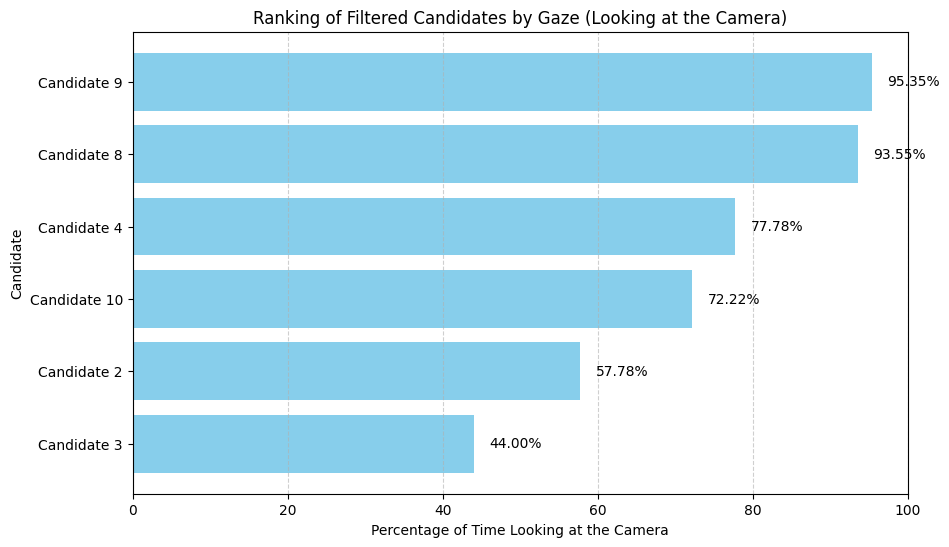

In [40]:
# Extract the names and percentages of the filtered candidates
filtered_candidate_names = [candidate for candidate in filtered_candidates]
filtered_candidate_percentages = [percentage_time_looking[candidate] for candidate in filtered_candidates]

# Create a bar chart to represent the ranking of filtered candidates
plt.figure(figsize=(10, 6))
plt.barh(filtered_candidate_names, filtered_candidate_percentages, color='skyblue')
plt.xlabel('Percentage of Time Looking at the Camera')
plt.ylabel('Candidate')
plt.title('Ranking of Filtered Candidates by Gaze (Looking at the Camera)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest percentage at the top
plt.xlim(0, 100)  # Set the x-axis limits to show percentages from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a grid to the x-axis for reference

# Add percentage values above each bar
for i, percentage in enumerate(filtered_candidate_percentages):
    plt.text(percentage + 2, i, f'{percentage:.2f}%', va='center', fontsize=10)

plt.show()


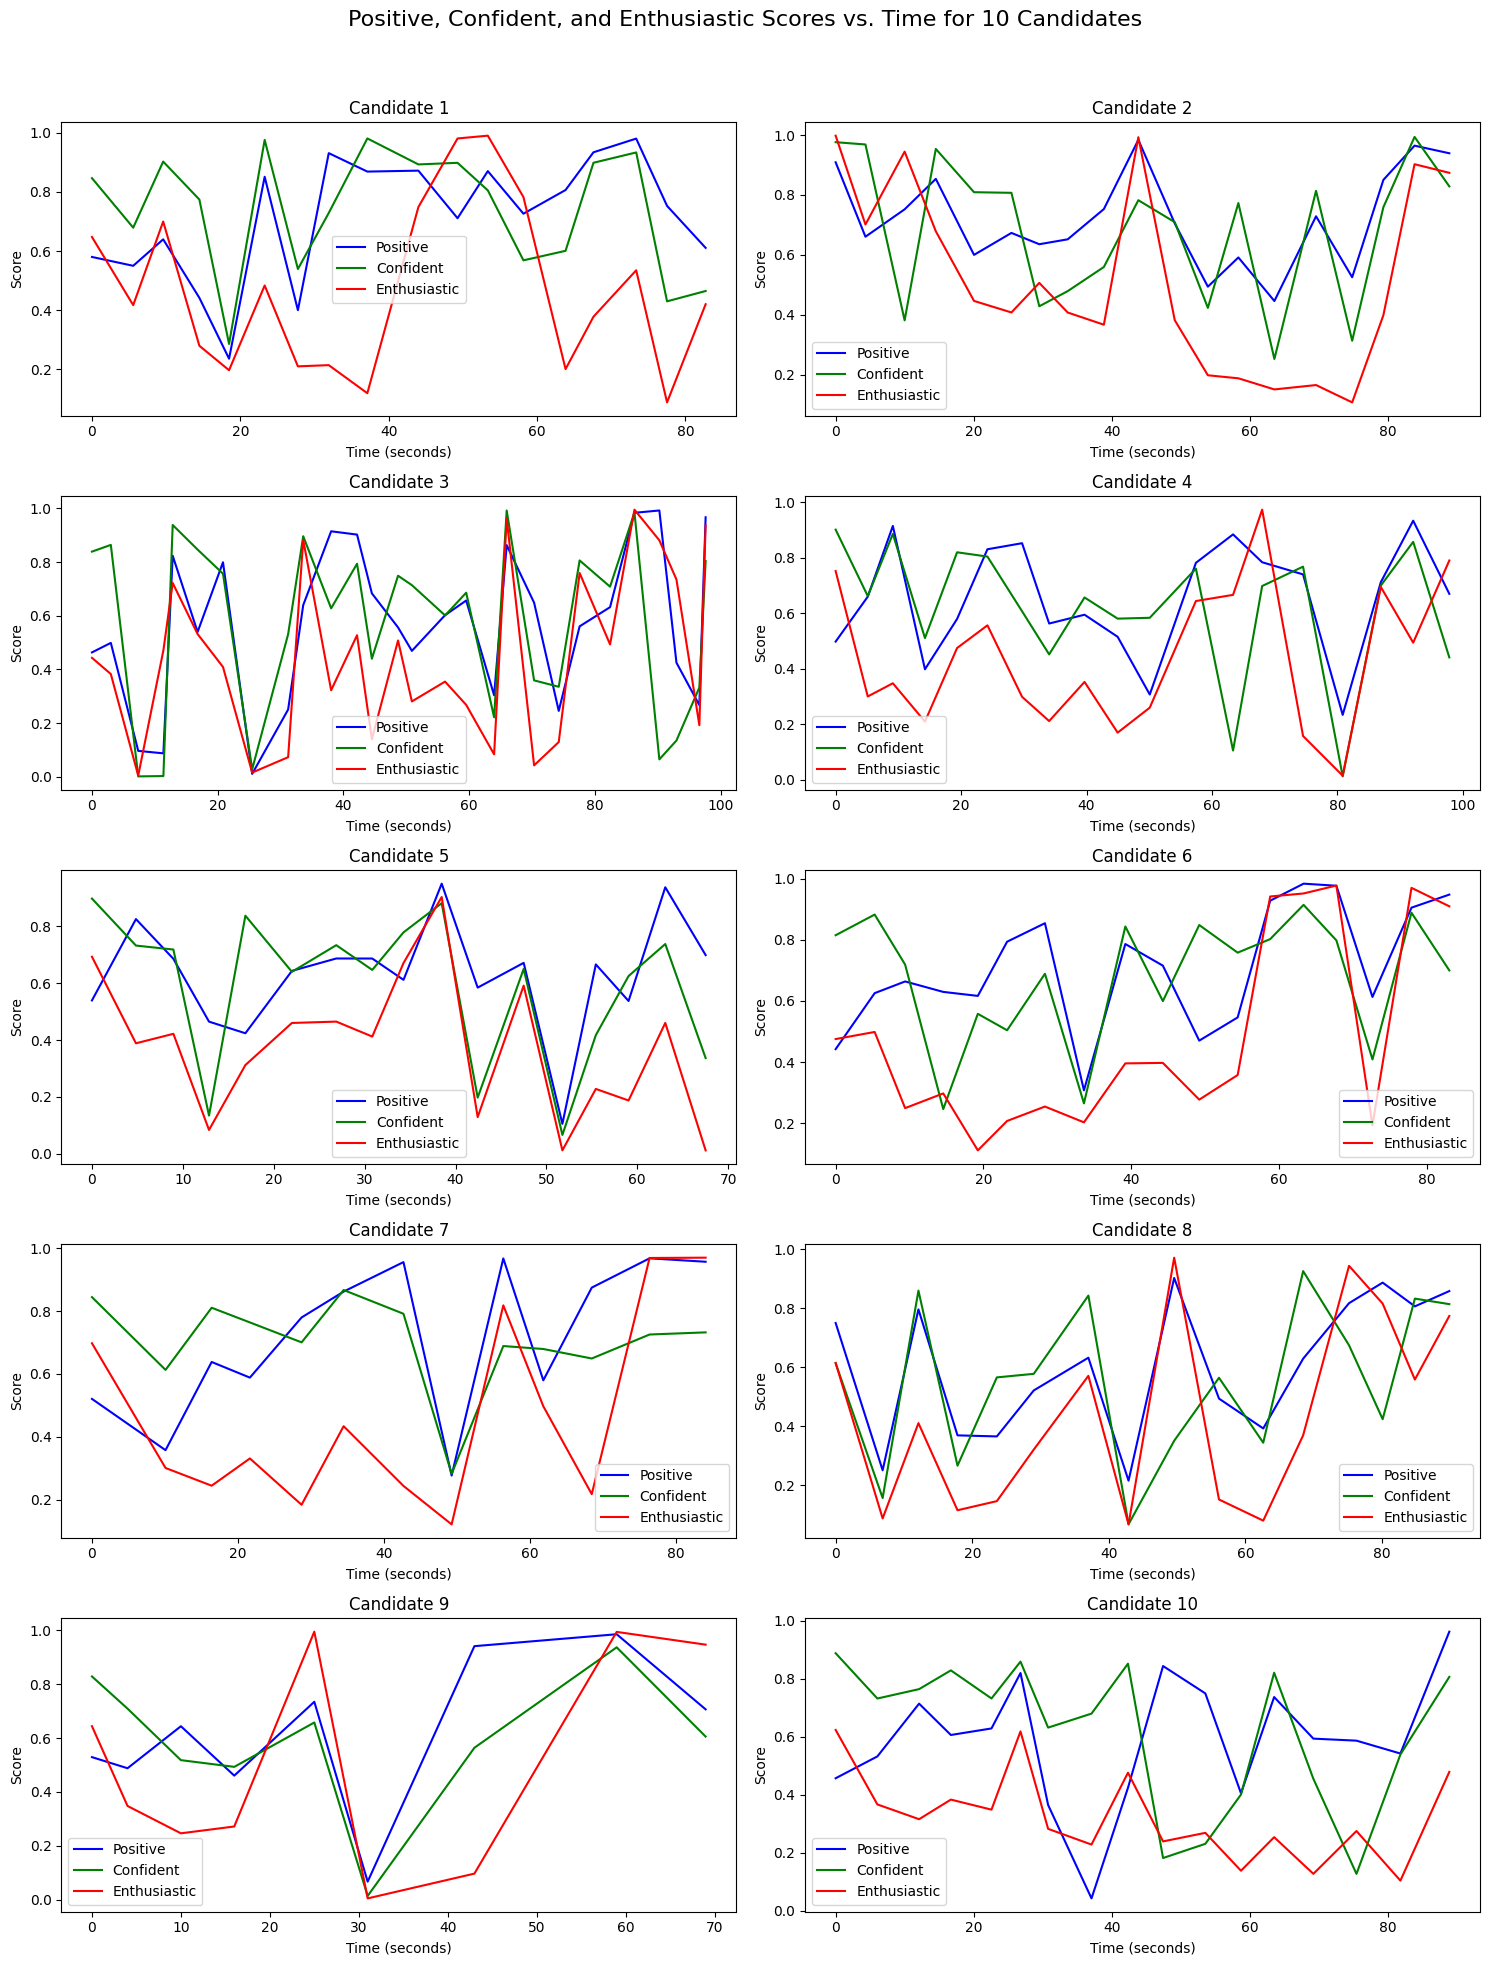

In [61]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create a figure and axes for subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Positive, Confident, and Enthusiastic Scores vs. Time for 10 Candidates', fontsize=16)

# Visualize positive, confident, and enthusiastic scores vs. time for each candidate
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Plot positive, confident, and enthusiastic scores over time
    ax.plot(df['start'], df['positive'], label='Positive', color='b')
    ax.plot(df['start'], df['confident'], label='Confident', color='g')
    ax.plot(df['start'], df['enthusiastic'], label='Enthusiastic', color='r')
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Score')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


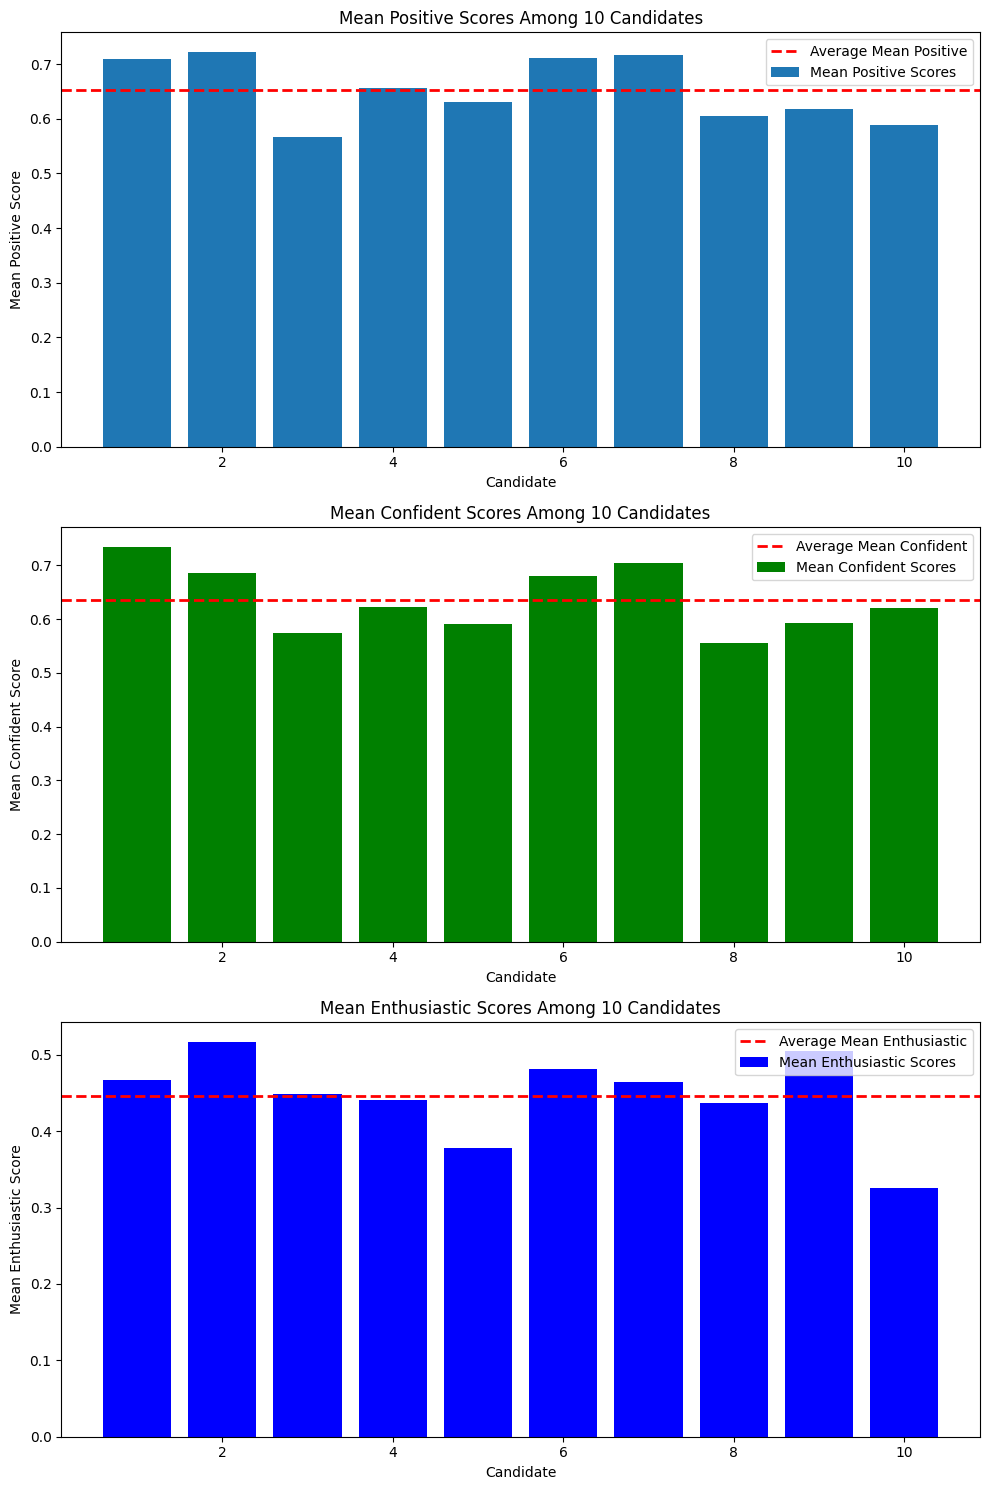

In [67]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Calculate the mean positive, confident, and enthusiastic scores for each candidate
mean_positive_scores = [df['positive'].mean() for df in dfs]
mean_confident_scores = [df['confident'].mean() for df in dfs]
mean_enthusiastic_scores = [df['enthusiastic'].mean() for df in dfs]

# Calculate the average values for each metric across all candidates
average_mean_positive = sum(mean_positive_scores) / len(mean_positive_scores)
average_mean_confident = sum(mean_confident_scores) / len(mean_confident_scores)
average_mean_enthusiastic = sum(mean_enthusiastic_scores) / len(mean_enthusiastic_scores)

# Create subplots for three different charts
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Chart 1: Mean Positive Scores
axs[0].bar(range(1, 11), mean_positive_scores, label='Mean Positive Scores')
axs[0].axhline(average_mean_positive, color='r', linestyle='--', label='Average Mean Positive', linewidth=2)
axs[0].set_title('Mean Positive Scores Among 10 Candidates')
axs[0].set_xlabel('Candidate')
axs[0].set_ylabel('Mean Positive Score')
axs[0].legend()

# Chart 2: Mean Confident Scores
axs[1].bar(range(1, 11), mean_confident_scores, color='g', label='Mean Confident Scores')
axs[1].axhline(average_mean_confident, color='r', linestyle='--', label='Average Mean Confident', linewidth=2)
axs[1].set_title('Mean Confident Scores Among 10 Candidates')
axs[1].set_xlabel('Candidate')
axs[1].set_ylabel('Mean Confident Score')
axs[1].legend()

# Chart 3: Mean Enthusiastic Scores
axs[2].bar(range(1, 11), mean_enthusiastic_scores, color='b', label='Mean Enthusiastic Scores')
axs[2].axhline(average_mean_enthusiastic, color='r', linestyle='--', label='Average Mean Enthusiastic', linewidth=2)
axs[2].set_title('Mean Enthusiastic Scores Among 10 Candidates')
axs[2].set_xlabel('Candidate')
axs[2].set_ylabel('Mean Enthusiastic Score')
axs[2].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


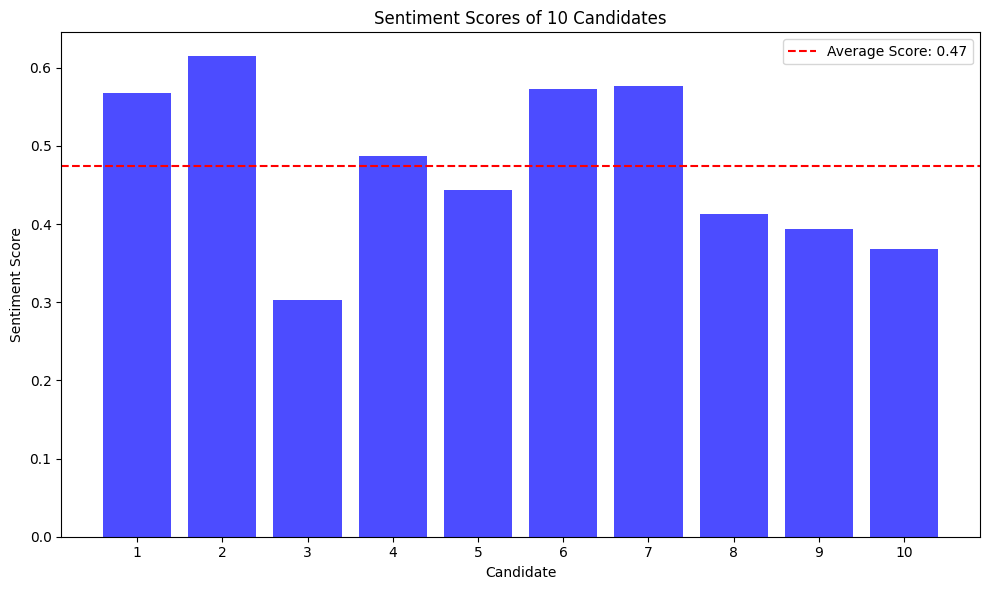

In [85]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Calculate the mean positive, negative, and neutral scores for each candidate
mean_positive_scores = [df['positive'].mean() for df in dfs]
mean_negative_scores = [df['negative'].mean() for df in dfs]
mean_neutral_scores = [df['neutral'].mean() for df in dfs]

# Define the sentiment scores (1 for positive, -1 for negative, 0 for neutral)
sentiment_scores = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

# Calculate the sentiment scores for each candidate
sentiment_scores_candidates = []

for i in range(len(dfs)):
    candidate_score = sum([
        mean_positive_scores[i] * sentiment_scores['positive'],
        mean_negative_scores[i] * sentiment_scores['negative'],
        mean_neutral_scores[i] * sentiment_scores['neutral']
    ])
    sentiment_scores_candidates.append(candidate_score)

# Calculate the average sentiment score
average_sentiment_score = sum(sentiment_scores_candidates) / len(sentiment_scores_candidates)

# Create a bar chart to compare the sentiment scores of all candidates
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), sentiment_scores_candidates, color='b', alpha=0.7)
plt.axhline(average_sentiment_score, color='r', linestyle='--', label=f'Average Score: {average_sentiment_score:.2f}')
plt.title('Sentiment Scores of 10 Candidates')
plt.xlabel('Candidate')
plt.ylabel('Sentiment Score')
plt.xticks(range(1, 11))
plt.legend()
plt.tight_layout()
plt.show()


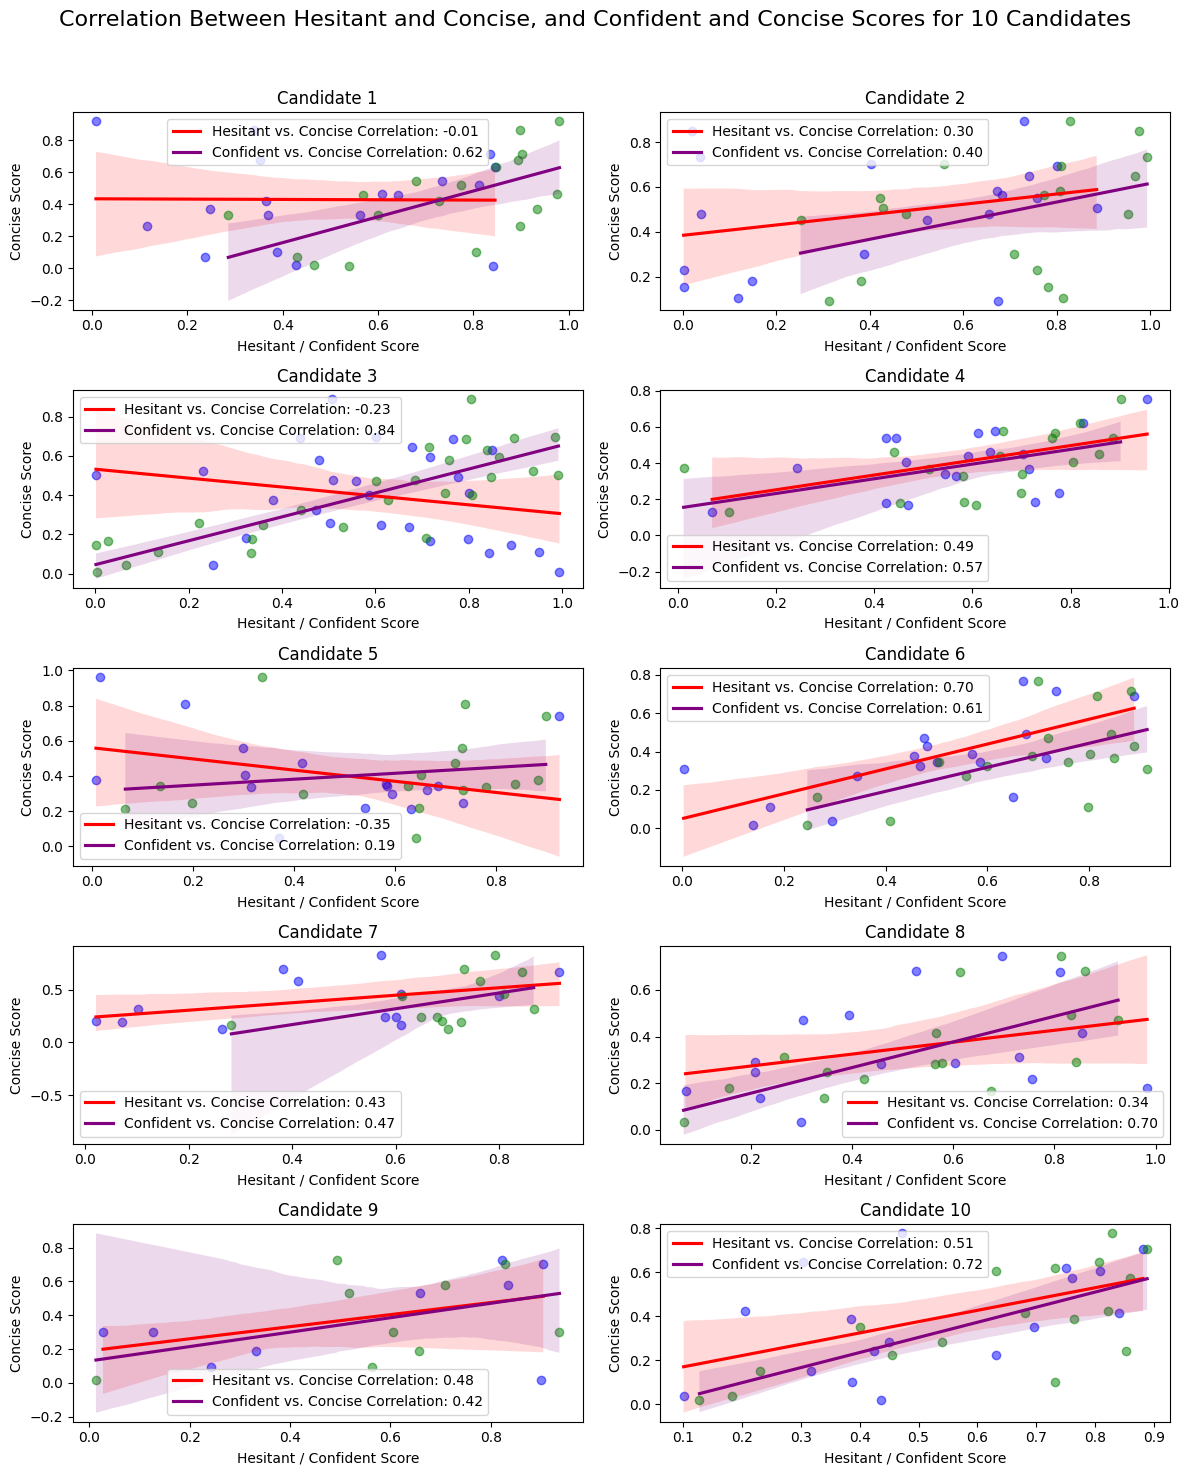

Candidates who are more hesitant and less concise: 
Candidates who are more confident and more concise: Candidate 1, Candidate 3, Candidate 5


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots for each candidate's correlation plots
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
fig.suptitle('Correlation Between Hesitant and Concise, and Confident and Concise Scores for 10 Candidates', fontsize=16)

# Initialize lists to store candidates who meet the criteria
more_hesitant_less_concise_candidates = []
more_confident_more_concise_candidates = []

# Calculate and plot the correlations for each candidate
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Calculate the correlations
    correlation_hesitant_concise = df['hesitant'].corr(df['concise'])
    correlation_confident_concise = df['confident'].corr(df['concise'])
    
    # Scatter plot for hesitant vs. concise with trendline
    sns.regplot(x='hesitant', y='concise', data=df, ax=ax, color='b', scatter_kws={'alpha':0.5}, 
                line_kws={'color': 'red', 'label': f'Hesitant vs. Concise Correlation: {correlation_hesitant_concise:.2f}'})
    
    # Scatter plot for confident vs. concise with trendline
    sns.regplot(x='confident', y='concise', data=df, ax=ax, color='g', scatter_kws={'alpha':0.5},
                line_kws={'color': 'purple', 'label': f'Confident vs. Concise Correlation: {correlation_confident_concise:.2f}'})
    
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Hesitant / Confident Score')
    ax.set_ylabel('Concise Score')
    
    # Check for candidates who meet the criteria
    if correlation_hesitant_concise > 0 and correlation_confident_concise < 0:
        more_hesitant_less_concise_candidates.append(f'Candidate {i + 1}')
    elif correlation_hesitant_concise < 0 and correlation_confident_concise > 0:
        more_confident_more_concise_candidates.append(f'Candidate {i + 1}')

# Add legends to the plots
for ax in axs.flat:
    ax.legend()

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print candidates who meet the criteria
print("Candidates who are more hesitant and less concise:", ', '.join(more_hesitant_less_concise_candidates))
print("Candidates who are more confident and more concise:", ', '.join(more_confident_more_concise_candidates))


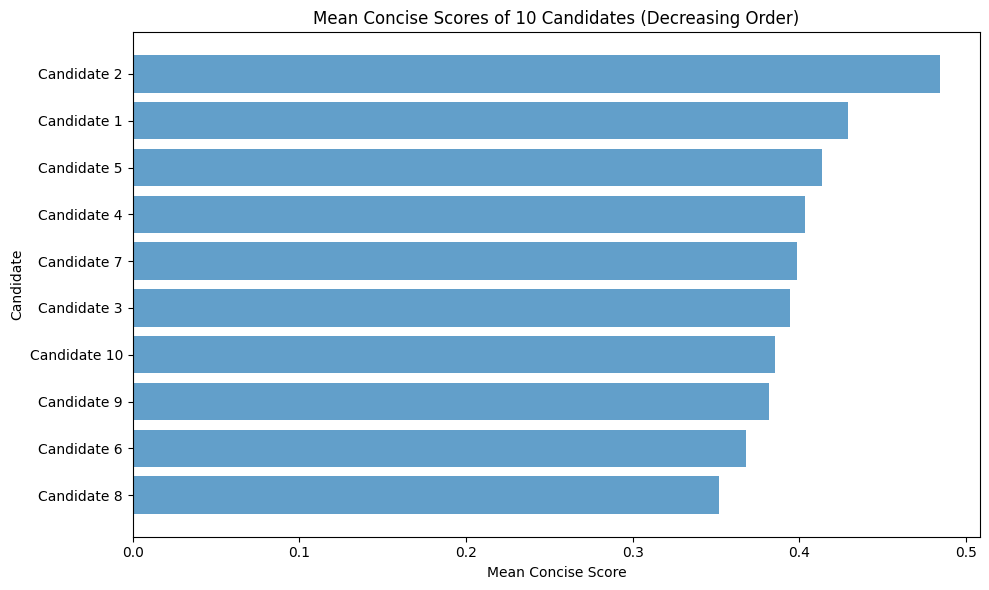

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Calculate the mean concise scores for each candidate
mean_concise_scores = [df['concise'].mean() for df in dfs]

# Create a DataFrame to store candidate names and mean concise scores
candidate_data = pd.DataFrame({
    'Candidate': [f'Candidate {i}' for i in range(1, 11)],
    'Mean Concise Score': mean_concise_scores
})

# Sort the DataFrame by mean concise scores in decreasing order
candidate_data_sorted = candidate_data.sort_values(by='Mean Concise Score', ascending=False)

# Create a horizontal bar chart (row chart) to compare the concise scores
plt.figure(figsize=(10, 6))
plt.barh(candidate_data_sorted['Candidate'], candidate_data_sorted['Mean Concise Score'], alpha=0.7)
plt.title('Mean Concise Scores of 10 Candidates (Decreasing Order)')
plt.xlabel('Mean Concise Score')
plt.ylabel('Candidate')
plt.gca().invert_yaxis()  # Invert the y-axis to display in decreasing order
plt.tight_layout()
plt.show()


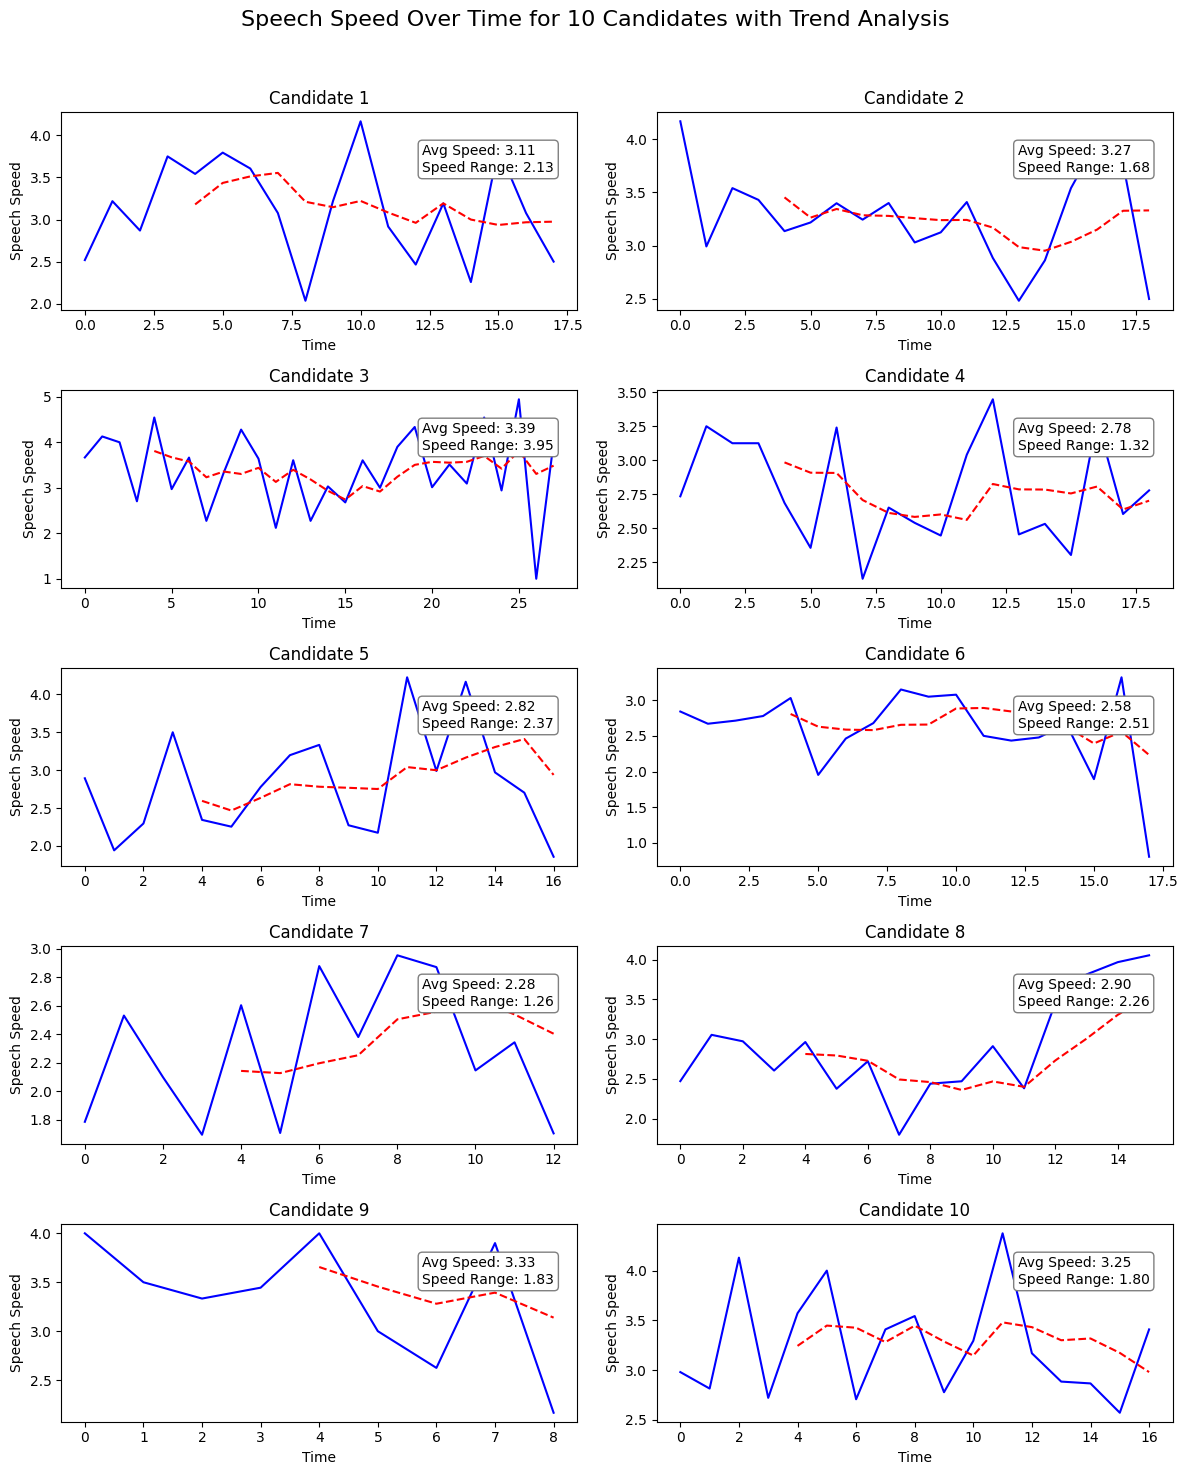

In [101]:

# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\transcript_data\\{i}_updated.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots for each candidate's speech speed over time
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
fig.suptitle('Speech Speed Over Time for 10 Candidates with Trend Analysis', fontsize=16)

# Define the window size for the moving average
window_size = 5  

# Calculate and plot speech speed with moving average for each candidate
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    speech_speed = df['speech_speed']
    time = df.index  # Assuming that the index represents time

    # Calculate the moving average
    moving_average = speech_speed.rolling(window=window_size).mean()

    # Plot speech speed over time with moving average
    ax.plot(time, speech_speed, color='b', label='Speech Speed')
    ax.plot(time, moving_average, color='r', label=f'{window_size}-Point Moving Avg', linestyle='--')
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Speech Speed')

    # Calculate average speech speed and speed range
    average_speed = speech_speed.mean()
    speed_range = speech_speed.max() - speech_speed.min()

    # Annotate the subplot with average speech speed and speed range
    ax.annotate(f'Avg Speed: {average_speed:.2f}\nSpeed Range: {speed_range:.2f}',
                xy=(0.7, 0.7), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"),
                fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


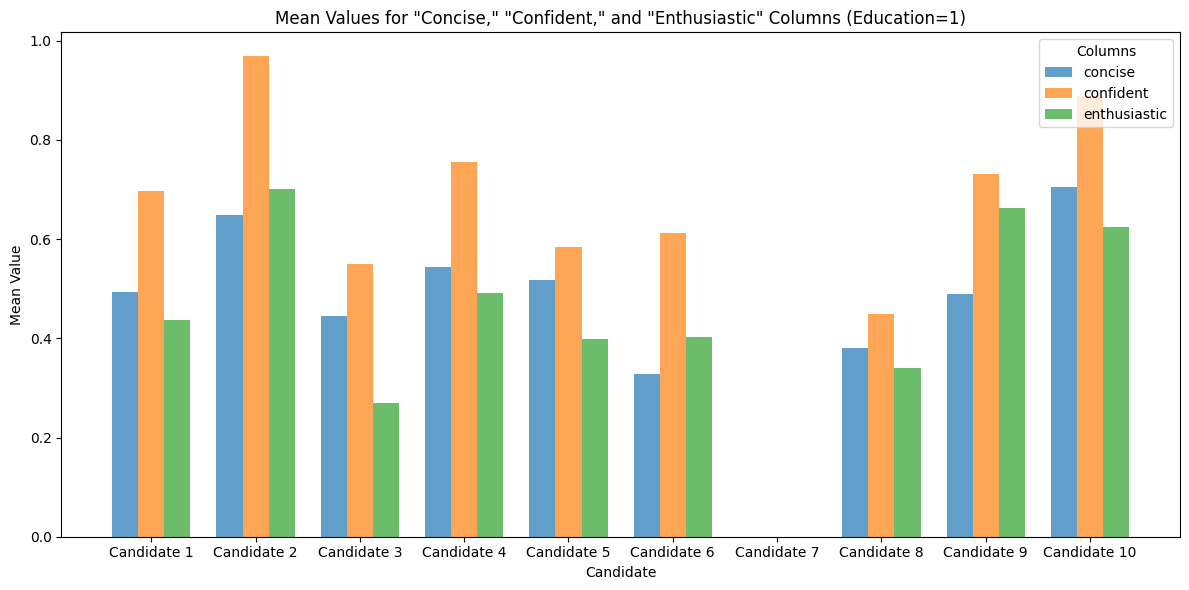

In [115]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\overall_data\\overall_data_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Calculate the mean values for "concise," "confident," and "enthusiastic" columns for each candidate where "education" is 1
mean_values = {'concise': [], 'confident': [], 'enthusiastic': []}

for df in dfs:
    relevant_education_df = df[df['education'] == 1]
    mean_concise = relevant_education_df['concise'].mean()
    mean_confident = relevant_education_df['confident'].mean()
    mean_enthusiastic = relevant_education_df['enthusiastic'].mean()
    
    mean_values['concise'].append(mean_concise)
    mean_values['confident'].append(mean_confident)
    mean_values['enthusiastic'].append(mean_enthusiastic)

# Create a bar chart to compare the mean values for "concise," "confident," and "enthusiastic" columns
candidates = [f'Candidate {i}' for i in range(1, 11)]
x = range(len(candidates))
width = 0.25

plt.figure(figsize=(12, 6))

for i, (column, mean_value) in enumerate(mean_values.items()):
    plt.bar([pos + width * i for pos in x], mean_value, width=width, label=column, alpha=0.7)

plt.title('Mean Values for "Concise," "Confident," and "Enthusiastic" Columns (Education=1)')
plt.xlabel('Candidate')
plt.ylabel('Mean Value')
plt.xticks([pos + width for pos in x], candidates)
plt.legend(loc='upper right', title='Columns')
plt.tight_layout()
plt.show()


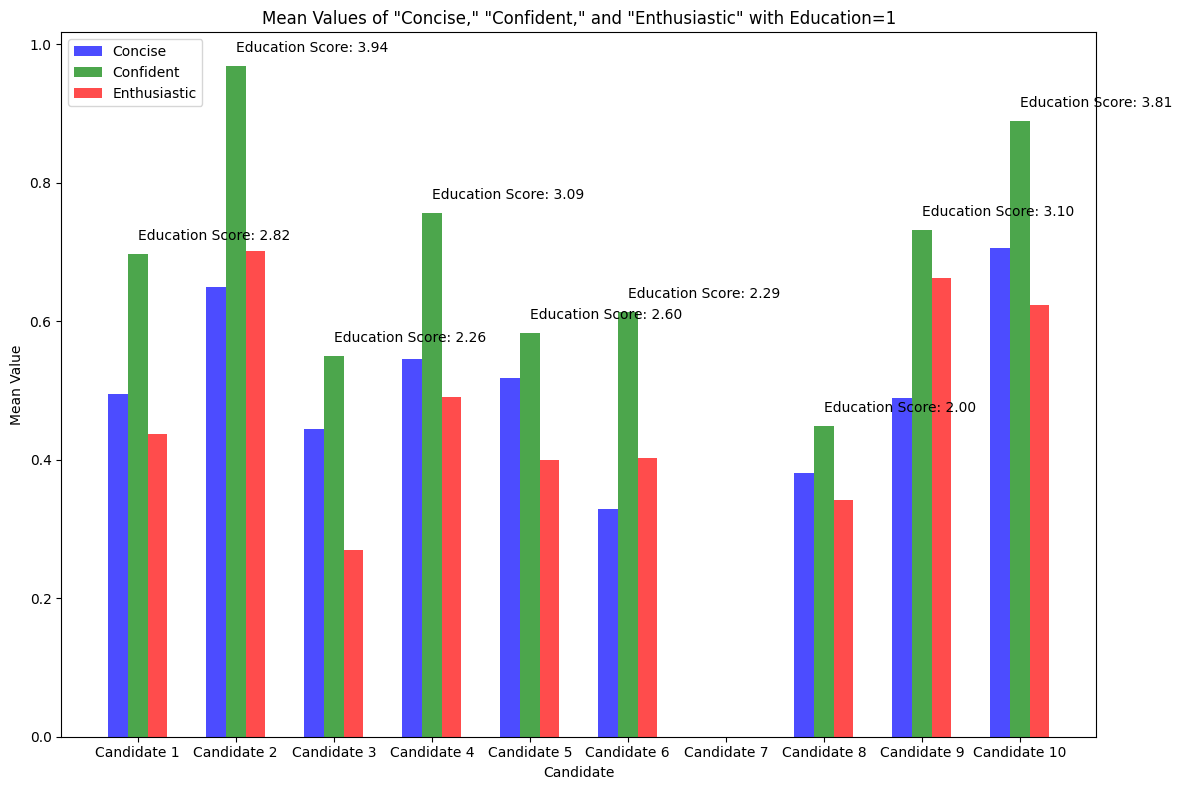

In [118]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\overall_data\\overall_data_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Define education_score weights
education_score_weights = {
    'concise': 2,
    'confident': 2,
    'enthusiastic': 1
}

# Calculate the education_score for each candidate where "education" is 1
education_scores = []

for df in dfs:
    relevant_education_df = df[df['education'] == 1]
    education_score = sum(
        education_score_weights[column] * relevant_education_df[column].mean()
        for column in education_score_weights
    )
    education_scores.append(education_score)

# Calculate the mean values for "concise," "confident," and "enthusiastic" columns
mean_concise_values = [df[df['education'] == 1]['concise'].mean() for df in dfs]
mean_confident_values = [df[df['education'] == 1]['confident'].mean() for df in dfs]
mean_enthusiastic_values = [df[df['education'] == 1]['enthusiastic'].mean() for df in dfs]

# Create a bar chart to compare the mean values and education_scores for all candidates
plt.figure(figsize=(12, 8))
x = range(1, 11)
width = 0.2

plt.bar([i - width for i in x], mean_concise_values, width=width, color='b', alpha=0.7, label='Concise')
plt.bar(x, mean_confident_values, width=width, color='g', alpha=0.7, label='Confident')
plt.bar([i + width for i in x], mean_enthusiastic_values, width=width, color='r', alpha=0.7, label='Enthusiastic')

plt.title('Mean Values of "Concise," "Confident," and "Enthusiastic" with Education=1')
plt.xlabel('Candidate')
plt.ylabel('Mean Value')
plt.xticks(x, [f'Candidate {i}' for i in x])
plt.legend(loc='upper left')

# Add education_scores as text annotations
for i, score in enumerate(education_scores):
    plt.annotate(f'Education Score: {score:.2f}', (x[i], max(mean_concise_values[i], mean_confident_values[i], mean_enthusiastic_values[i]) + 0.02))

plt.tight_layout()
plt.show()


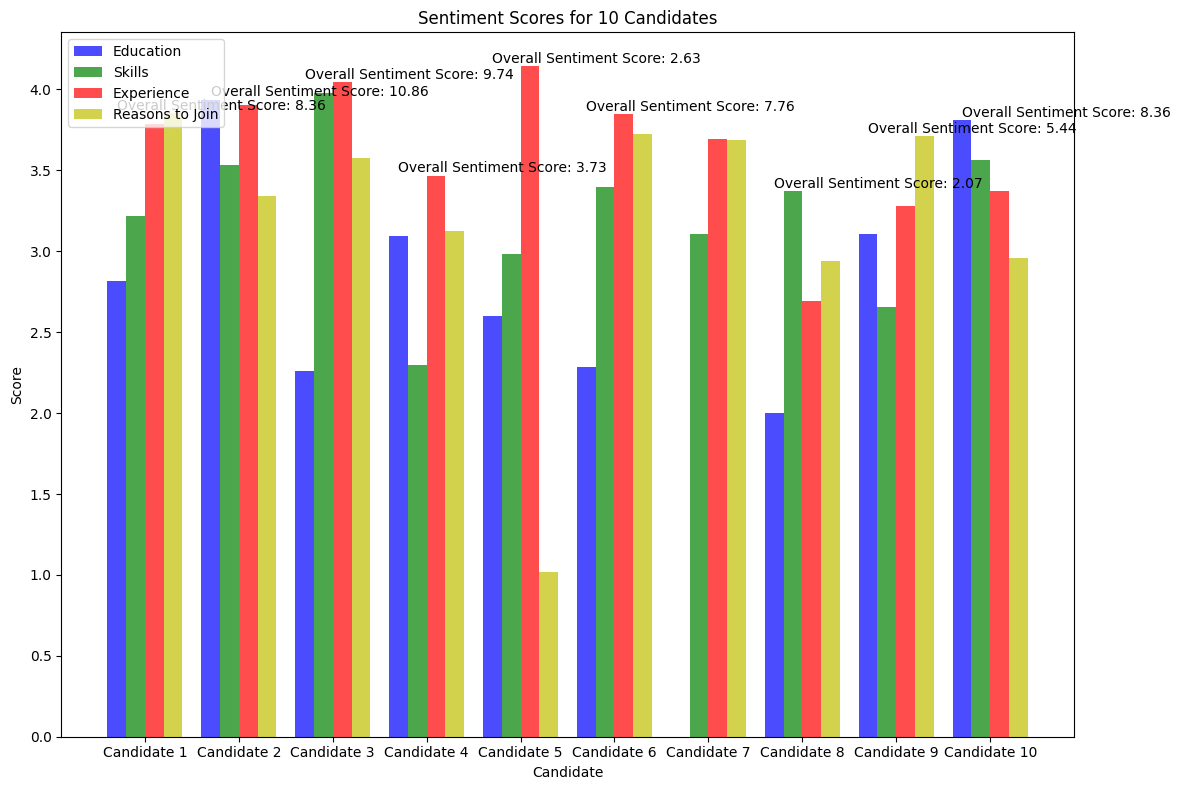

In [124]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\overall_data\\overall_data_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Define weights for sentiment scores
sentiment_weights = {
    'education': {'concise': 2, 'confident': 2, 'enthusiastic': 1},
    'skills': {'concise': 2, 'confident': 3, 'enthusiastic': 1},
    'experience': {'concise': 2, 'confident': 3, 'enthusiastic': 2},
    'reasons_to_join': {'concise': 1, 'confident': 2, 'enthusiastic': 3}
}

# Calculate the sentiment scores for each candidate
sentiment_scores = {candidate: {} for candidate in range(1, 11)}

for i, df in enumerate(dfs):
    for key in sentiment_weights:
        relevant_df = df[df[key] == 1]
        sentiment_score = sum(
            sentiment_weights[key][column] * relevant_df[column].mean()
            for column in sentiment_weights[key]
        )
        sentiment_scores[i + 1][key] = sentiment_score

# Calculate the overall_sentiment_score for each candidate
overall_sentiment_scores = {}

for candidate in sentiment_scores:
    overall_sentiment_score = sum(
        (sentiment_scores[candidate][key] - weight) * sentiment_weights[key]['confident']
        for key, weight in {
            'education': 1,
            'skills': 2,
            'experience': 4,
            'reasons_to_join': 3
        }.items()
    )
    overall_sentiment_scores[candidate] = overall_sentiment_score

# Create a bar chart to compare sentiment scores for all candidates
candidates = [f'Candidate {i}' for i in range(1, 11)]
x = range(1, 11)

plt.figure(figsize=(12, 8))
plt.bar(x, [sentiment_scores[candidate]['education'] for candidate in sentiment_scores], width=0.2, color='b', alpha=0.7, label='Education')
plt.bar([i + 0.2 for i in x], [sentiment_scores[candidate]['skills'] for candidate in sentiment_scores], width=0.2, color='g', alpha=0.7, label='Skills')
plt.bar([i + 0.4 for i in x], [sentiment_scores[candidate]['experience'] for candidate in sentiment_scores], width=0.2, color='r', alpha=0.7, label='Experience')
plt.bar([i + 0.6 for i in x], [sentiment_scores[candidate]['reasons_to_join'] for candidate in sentiment_scores], width=0.2, color='y', alpha=0.7, label='Reasons to Join')

# Add overall_sentiment_scores as text annotations
for i, score in enumerate(overall_sentiment_scores.values()):
    plt.annotate(f'Overall Sentiment Score: {score:.2f}', (x[i], max(sentiment_scores[i + 1].values()) + 0.02))

plt.title('Sentiment Scores for 10 Candidates')
plt.xlabel('Candidate')
plt.ylabel('Score')
plt.xticks([i + 0.3 for i in x], candidates)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


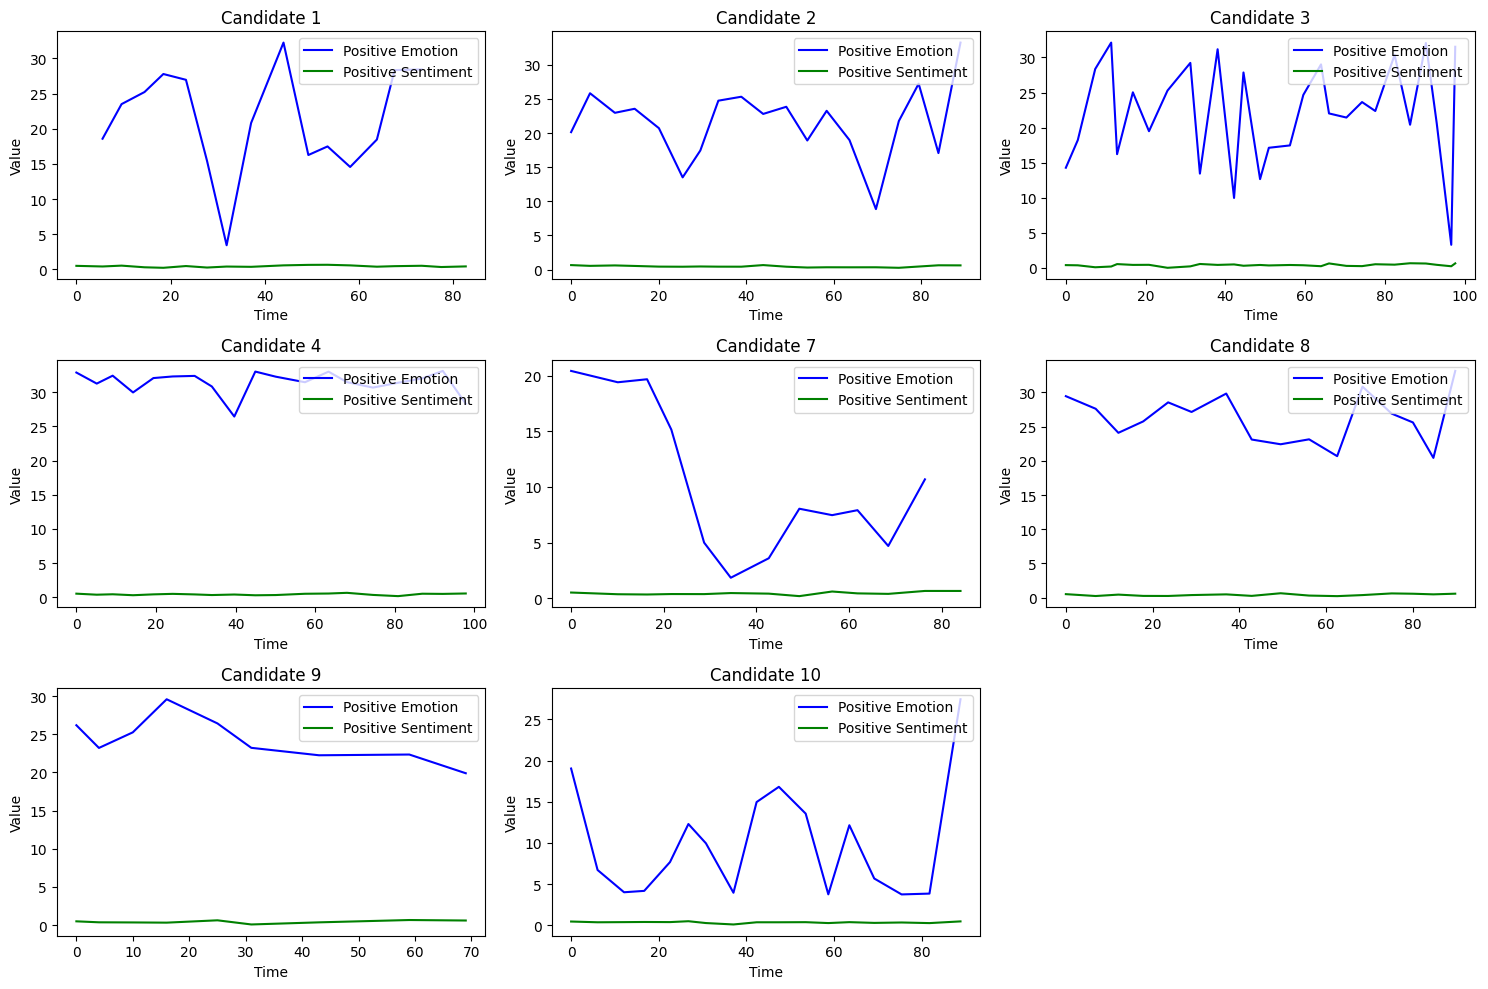

In [131]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\overall_data\\overall_data_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Define a function to calculate positive emotion and positive sentiment
def calculate_positive_values(row):
    positive_emotion = (row['happy'] + row['surprise'] + row['neutral_emotion']) / 3
    positive_sentiment = (row['positive'] + row['neutral_sentiment'] + row['enthusiastic']) / 3
    return positive_emotion, positive_sentiment

# Create subplots for each candidate (excluding candidates 5 and 6)
plt.figure(figsize=(15, 10))
subplot_idx = 1

for i, df in enumerate(dfs):
    if i + 1 not in [5, 6]:
        plt.subplot(3, 3, subplot_idx)
        plt.title(f'Candidate {i + 1}')
        plt.xlabel('Time')
        plt.ylabel('Value')
        
        # Calculate positive emotion and positive sentiment for each row
        positive_emotions = []
        positive_sentiments = []
        
        for _, row in df.iterrows():
            pos_emotion, pos_sentiment = calculate_positive_values(row)
            positive_emotions.append(pos_emotion)
            positive_sentiments.append(pos_sentiment)
        
        # Plot positive emotion and positive sentiment over time
        plt.plot(df['start'], positive_emotions, label='Positive Emotion', color='b')
        plt.plot(df['start'], positive_sentiments, label='Positive Sentiment', color='g')
        plt.legend(loc='upper right')
        
        subplot_idx += 1

plt.tight_layout()
plt.show()


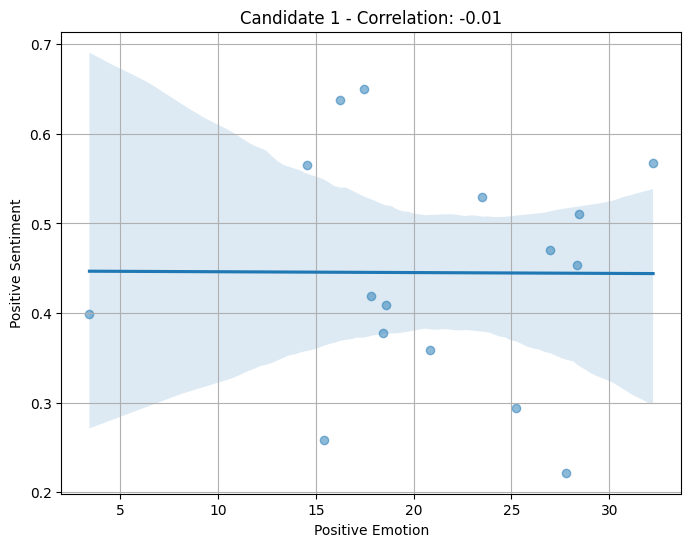

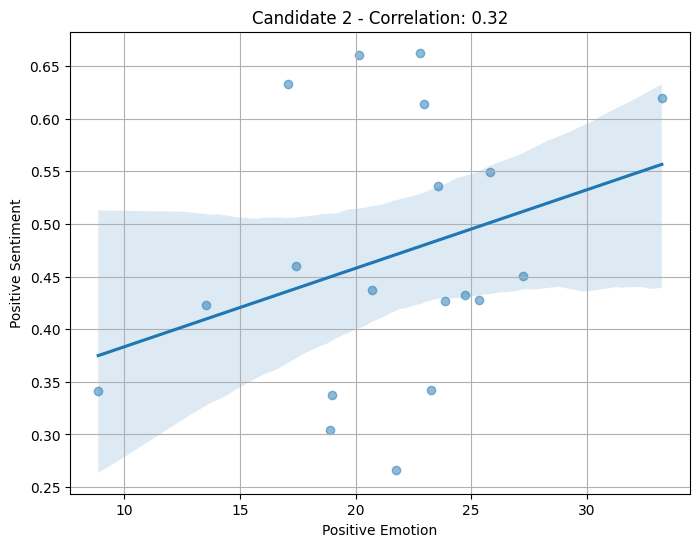

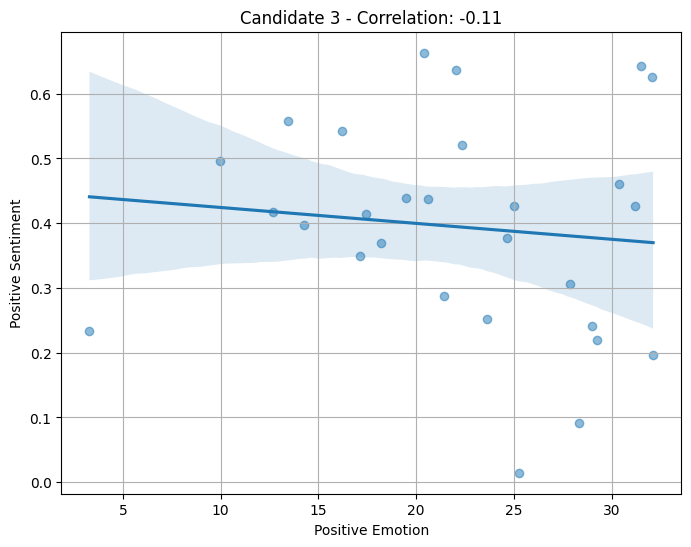

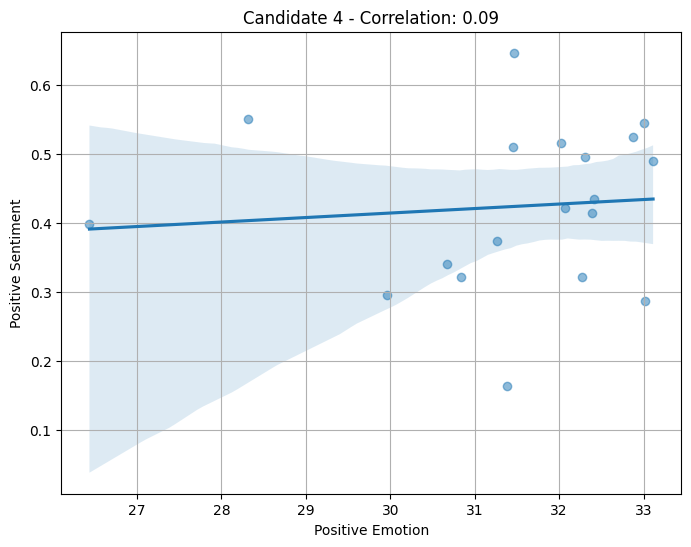

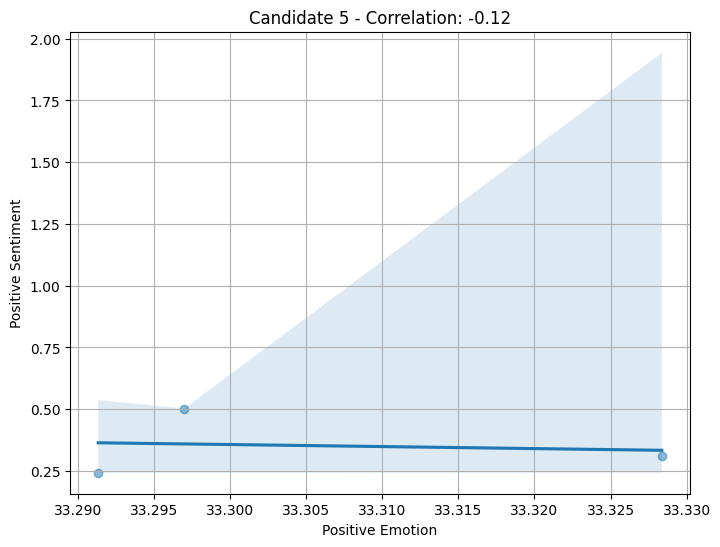

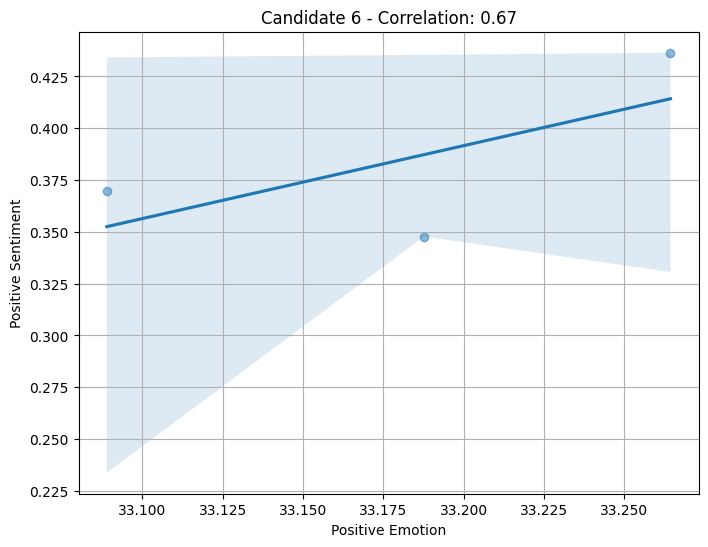

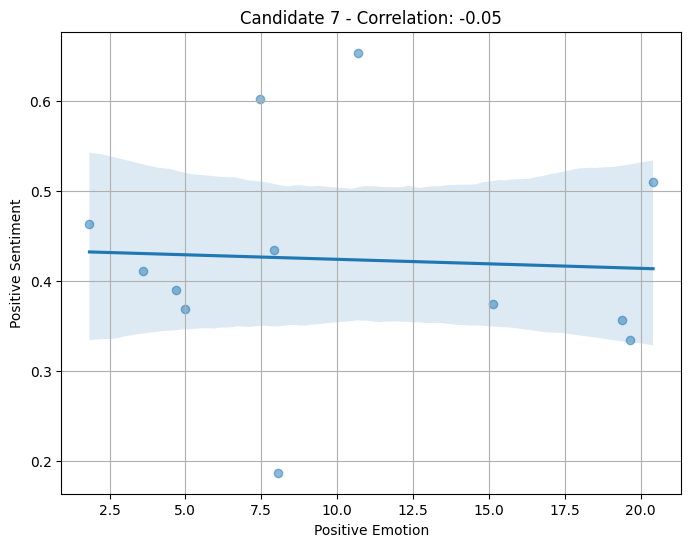

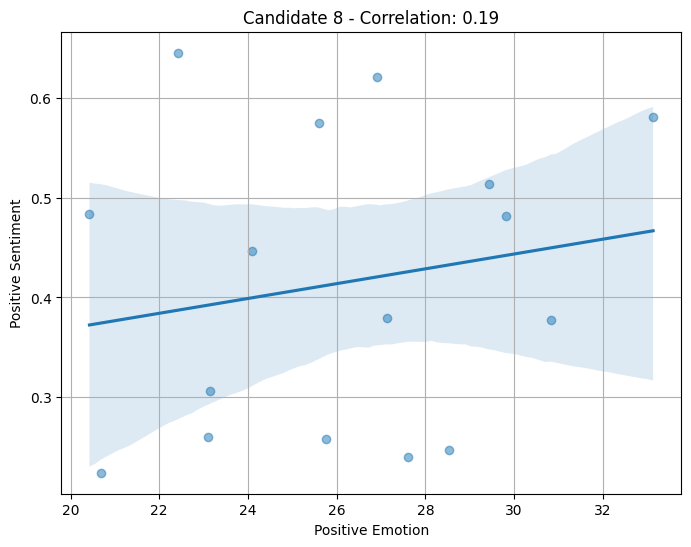

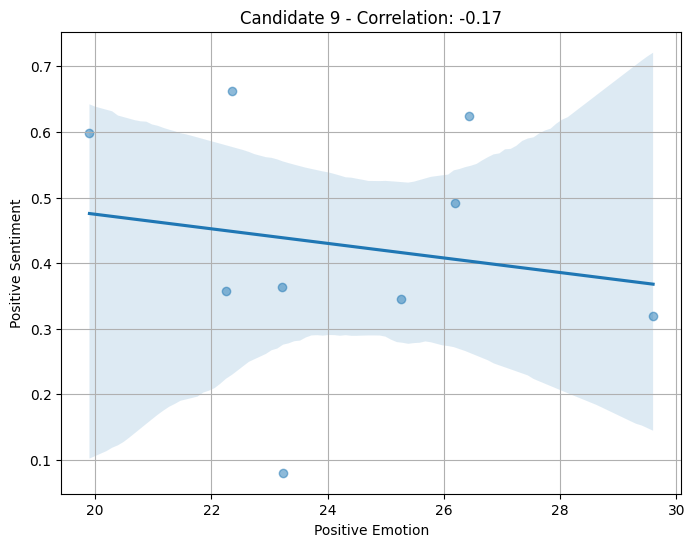

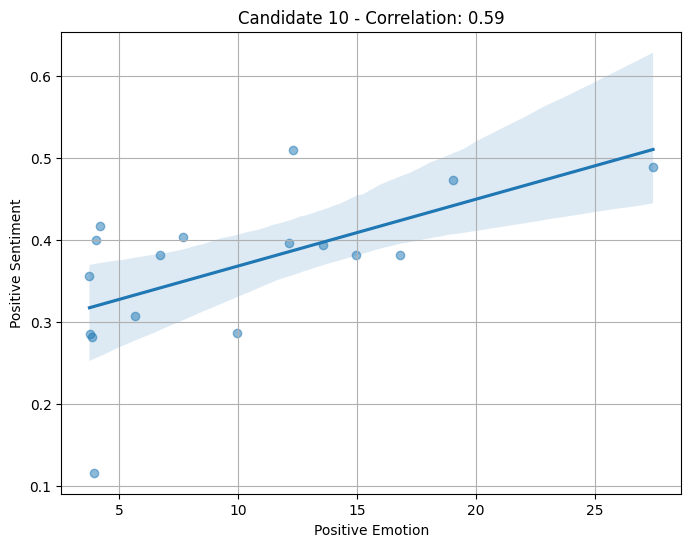

Candidate 1 - Correlation: -0.01
Candidate 2 - Correlation: 0.32
Candidate 3 - Correlation: -0.11
Candidate 4 - Correlation: 0.09
Candidate 5 - Correlation: -0.12
Candidate 6 - Correlation: 0.67
Candidate 7 - Correlation: -0.05
Candidate 8 - Correlation: 0.19
Candidate 9 - Correlation: -0.17
Candidate 10 - Correlation: 0.59


In [133]:
# Create a list to store the dataframes for each candidate
dfs = []

# Read and store the data for each candidate
for i in range(1, 11):
    file_path = f"C:\\Users\\HP\\Desktop\\I'mBesideYou\\overall_data\\overall_data_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

# Define a function to calculate positive emotion and positive sentiment
def calculate_positive_values(row):
    positive_emotion = (row['happy'] + row['surprise'] + row['neutral_emotion']) / 3
    positive_sentiment = (row['positive'] + row['neutral_sentiment'] + row['enthusiastic']) / 3
    return positive_emotion, positive_sentiment

# Calculate the Pearson correlation coefficient and visualize the relationship for each candidate
correlations = []

for i, df in enumerate(dfs):
    positive_emotions = []
    positive_sentiments = []
    
    for _, row in df.iterrows():
        pos_emotion, pos_sentiment = calculate_positive_values(row)
        positive_emotions.append(pos_emotion)
        positive_sentiments.append(pos_sentiment)
    
    # Calculate the Pearson correlation coefficient
    correlation = pd.Series(positive_emotions).corr(pd.Series(positive_sentiments))
    correlations.append(correlation)
    
    # Plot a scatterplot with a regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=positive_emotions, y=positive_sentiments, scatter_kws={'alpha':0.5})
    plt.title(f'Candidate {i + 1} - Correlation: {correlation:.2f}')
    plt.xlabel('Positive Emotion')
    plt.ylabel('Positive Sentiment')
    plt.grid(True)
    plt.show()

# Print the correlations for each candidate
for i, correlation in enumerate(correlations):
    print(f'Candidate {i + 1} - Correlation: {correlation:.2f}')
